In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [2]:
import pandas as pd
import numpy as np
import random
np.random.seed(1234)
random.seed(1234)

In [3]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/sample_submission.csv")

In [4]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

우리의 목표는 주택의 SalePrice를 예측하는 것으로 연속적인 값을 예측하는 회귀 분석을 해아한다

이때 데이터 타입이 숫자가 아닌것은 분석할 때 수치를 나타내기 힘들기 때문에 카테고리 변수로 변환시켜야 한다

이때 값이 NaN으로 없는 경우도 있는데 이는 비워두는 것 보다는 missing이나 no와 같이 통일된 문자로 변환시킨 뒤 변환시키면 좋다

In [7]:
train_df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [8]:
all_df = pd.concat([train_df, test_df], sort = False).reset_index(drop = True)
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [9]:
all_df.SalePrice

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [10]:
# dtype이 object인 것들 찾아서 카테고리 변수로 수치 변환
from sklearn.preprocessing import LabelEncoder
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [11]:
all_df.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [12]:
for cat in categories:
    le = LabelEncoder()
    all_df[cat].fillna("missing", inplace = True) # 비어있는것 missing으로 채우기
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,2,3,3,0,...,0,3,4,4,0,6,2006,8,4,NaN
2915,2916,160,4,21.0,1894,1,2,3,3,0,...,0,3,4,4,0,4,2006,8,0,NaN
2916,2917,20,3,160.0,20000,1,2,3,3,0,...,0,3,4,4,0,9,2006,8,0,NaN
2917,2918,85,3,62.0,10441,1,2,3,3,0,...,0,3,2,2,700,7,2006,8,4,NaN


In [13]:
all_df.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice         float64
Length: 81, dtype: object

In [14]:
# 데이터를 다듬은 후 다시 train과 test로 분리
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

In [15]:
# lightGBM을 사용해서 결과값 예측하기
import lightgbm as lgb
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits = folds)

In [16]:
lgbm_params = {
    "objective" : "regression",
    "random_seed" : 1234
}

In [17]:
# 설명 변수와 목적 변수 분리
train_X = train_df_le.drop(["SalePrice", "Id"], axis = 1)
train_Y = train_df_le["SalePrice"]

In [18]:
# 평가 지표인 평균 제곱 오차 불러오기
from sklearn.metrics import mean_squared_error

In [19]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_idx, val_idx, in kf.split(train_X):
    X_train = train_X.iloc[train_idx]
    X_valid = train_X.iloc[val_idx]
    y_train = train_Y.iloc[train_idx]
    y_valid = train_Y.iloc[val_idx]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets = lgb_eval,
                          num_boost_round = 100,
                          early_stopping_rounds = 20,
                          verbose_eval = 10
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.59541e+09
[20]	valid_0's l2: 7.467e+08
[30]	valid_0's l2: 5.96558e+08
[40]	valid_0's l2: 5.49479e+08
[50]	valid_0's l2: 5.29299e+08
[60]	valid_0's l2: 5.28785e+08
[70]	valid_0's l2: 5.32577e+08
Early stopping, best iteration is:
[57]	valid_0's l2: 5.26368e+08
0.12637668452645173
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 2.08125e+09
[20]	valid_0's l2: 1.23117e+09
[30]	valid_0's l2: 1.04155e+09
[40]	valid_0's l2: 9.92123e+08
[50]	valid_0's l2: 9.69222e+08
[60]	valid_0's l2: 9.54807e+08
[70]	valid_0's l2: 9.50536e+08
[80]	valid_0's l2: 9.45353e+08
[90]	valid_0's l2: 9.40359e+08
[100]	valid_0's l2: 9.36486e+08
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 9.36066e+08
0.15229205843857013
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.78839e+09
[20]	valid_0's l2: 1.03494e+09
[30]	valid_0's l2: 8.77181e+08
[40]	valid_0'

In [20]:
sum(rmses) / len(rmses)

0.13697846250952908

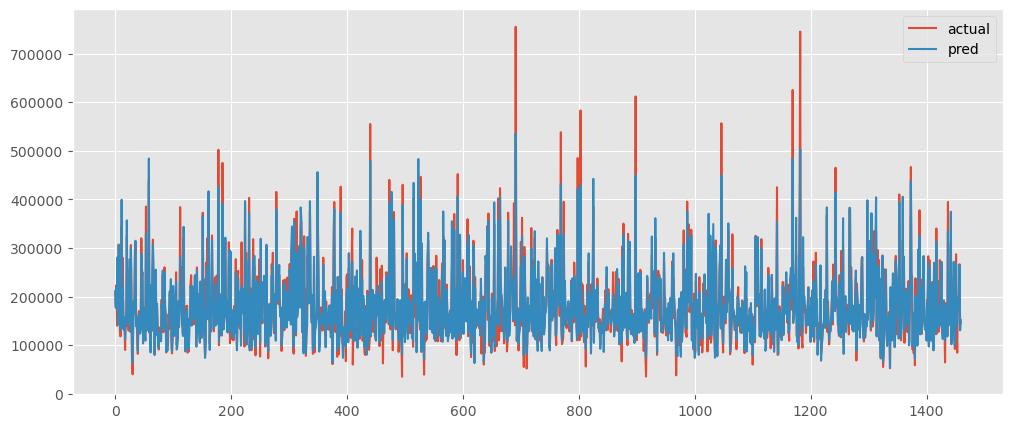

In [21]:
# 예측 값과 실제 값의 차이 시각화
actual_pred_df = pd.DataFrame({
    "actual" : train_Y,
    "pred" : oof
})
actual_pred_df.plot(figsize = (12, 5))

위 도표를 보면 대부분 값을 정확히 예측 했으나 실제 값 중에서 이상치에 해당하는 부분은 오차가 심한것을 볼 수 있다

따라서 일반적인 경향과 다른 이상치를 학습에서 제외하여 더 좋은 데이터로 학습을 하는 것이 좋아보인다

이때 변수가 많아 한번에 모두 표시 할 수 없으므로 각 모델별로 상위 15개만 분석한다.

그리고 importance_type을 gain으로 하여 어떤 분기로 갔을 때 좋은 점수를 얻었는지 확인을 한다

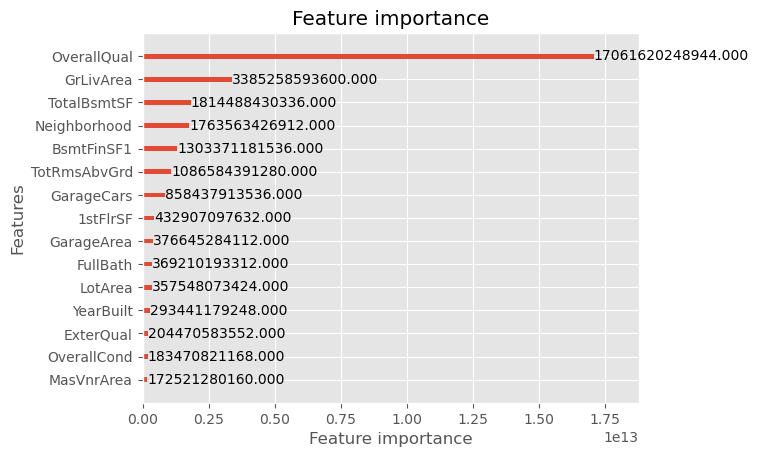

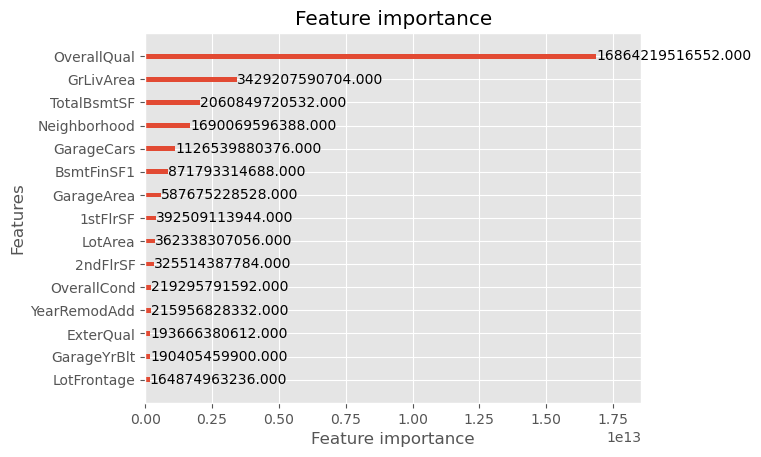

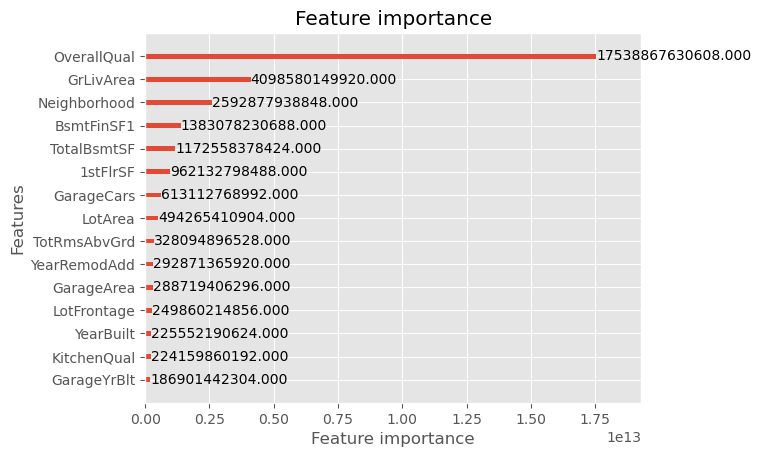

In [22]:
for model in models:
    lgb.plot_importance(model, importance_type = "gain", max_num_features = 15)

이를 통해서 OverallQual가 가장 크게 영향을 미쳤다는 것을 알 수 있다.

OverallQual는 주택 전체의 재료와 마감 등의 퀄리티를 의미하는 변수이다.

그 다음은 GrLivArea가 영향을 미쳤다는 것을 볼 수 있는데 이는 주거하는 영역의 크기를 의미한다

In [23]:
# SalePrice 변수 분석
train_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

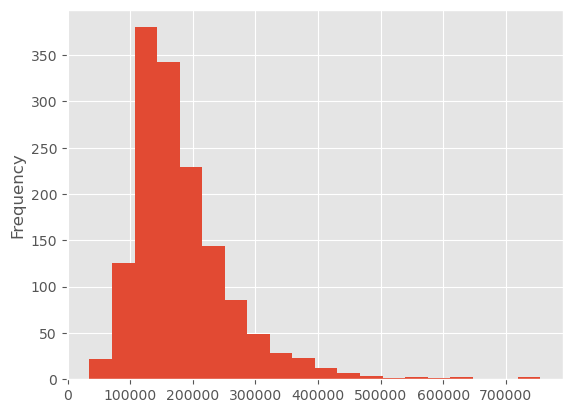

In [24]:
train_df.SalePrice.plot.hist(bins = 20)

가격이 정규분포가 아니고 한쪽으로 치우쳐져있다.

다만 이 대회에서는 평가 지표가 로그의 RMSE임으로 목적변수를 로그화 하는것이 좋은 평가지표를 표현하기 쉽다

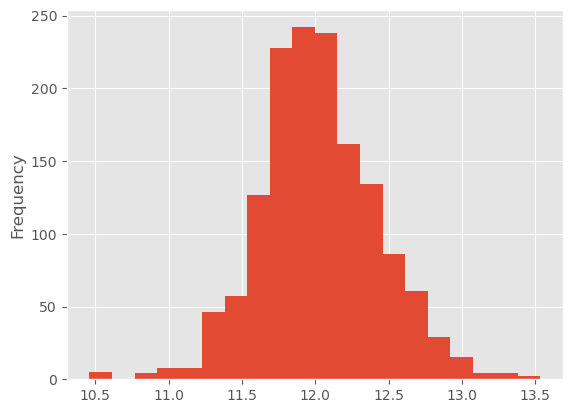

In [25]:
np.log(train_df.SalePrice).plot.hist(bins = 20)

In [26]:
# 목적 변수를 로그화 하여 예측 정확도 향상
train_df_le["SalePrice_log"] = np.log(train_df_le.SalePrice)
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis = 1)
train_Y = train_df_le["SalePrice_log"]

C:\Users\leedo\AppData\Local\Temp\ipykernel_20376\3543251224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_le["SalePrice_log"] = np.log(train_df_le.SalePrice)


In [27]:
import warnings
warnings.filterwarnings("ignore")

models = []
rmses = []
oof = np.zeros(len(train_X))

for train_idx, val_idx, in kf.split(train_X):
    X_train = train_X.iloc[train_idx]
    X_valid = train_X.iloc[val_idx]
    y_train = train_Y.iloc[train_idx]
    y_valid = train_Y.iloc[val_idx]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets = lgb_eval,
                          num_boost_round = 100,
                          early_stopping_rounds = 20,
                          verbose_eval = 10
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0435757
[20]	valid_0's l2: 0.0223987
[30]	valid_0's l2: 0.0176962
[40]	valid_0's l2: 0.0164304
[50]	valid_0's l2: 0.0161943
[60]	valid_0's l2: 0.0161858
[70]	valid_0's l2: 0.0161666
[80]	valid_0's l2: 0.0161769
[90]	valid_0's l2: 0.0162121
Early stopping, best iteration is:
[73]	valid_0's l2: 0.0161129
0.010713887493550796
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0480056
[20]	valid_0's l2: 0.0274907
[30]	valid_0's l2: 0.022779
[40]	valid_0's l2: 0.0214744
[50]	valid_0's l2: 0.0209095
[60]	valid_0's l2: 0.0205922
[70]	valid_0's l2: 0.0204381
[80]	valid_0's l2: 0.0203135
[90]	valid_0's l2: 0.020318
[100]	valid_0's l2: 0.0202246
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.0202246
0.012122364246993625
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0388654
[20]	valid_0's l2: 0.0209198
[30]	valid_0's l2: 0.0176

In [28]:
sum(rmses) / len(rmses)

0.011215814478375608

In [29]:
# 설명 변수의 전처리 - 결측치 확인
all_df = pd.concat([train_df, test_df], sort = False).reset_index(drop = True)
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [30]:
all_df.isnull().sum().sort_values(ascending = False).head(40)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
GarageArea         1
BsmtFinSF2         1
Exterior1st        1
TotalBsmtSF        1
GarageCars         1
BsmtUnfSF          1
Electrical         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
Exterior2nd        1
Street             0
RoofMatl           0
MSSubClass         0
LotArea            0
OverallCond        0
dtype: int64

SalePrice의 경우는 test에 값이 없으므로 결측치가 존재 할 수 밖에 없다

다만 PoolQC, MiscFeature, Alley, Fence, FireplaceQu 등은 많은 결측치를 가지고 있다

In [31]:
# 시설이 있으면 1 아니면 0으로 값 변환
HighFacility = ["PoolQC", "MiscFeature", "Alley"]
for facility in HighFacility:
    all_df.loc[~all_df[facility].isnull(), facility] = 1
    all_df.loc[all_df[facility].isnull(), facility] = 0

In [32]:
all_df["hasHighFacility"] = all_df["PoolQC"] + all_df["MiscFeature"] + all_df["Alley"]
all_df["hasHighFacility"] = all_df["hasHighFacility"].astype(int)

In [33]:
all_df["hasHighFacility"].value_counts()

0    2615
1     295
2       9
Name: hasHighFacility, dtype: int64

In [34]:
all_df = all_df.drop(HighFacility, axis = 1)
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,2,2008,WD,Normal,208500.0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,NaN,0,5,2007,WD,Normal,181500.0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,NaN,0,9,2008,WD,Normal,223500.0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,NaN,0,2,2006,WD,Abnorml,140000.0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,NaN,0,12,2008,WD,Normal,250000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,6,2006,WD,Normal,NaN,0
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,4,2006,WD,Abnorml,NaN,0
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,9,2006,WD,Abnorml,NaN,0
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,MnPrv,700,7,2006,WD,Normal,NaN,1


데이터 중에서 크기가 너무 큰 경우나 작은 경우와 같이 일반적인 경향과 다른 데이터가 있을 경우 훈련도중 모델이 이런 노이즈에 민감하게 반응하여 일반화가 잘 되지 않을 수도 있다.

다만 이상치를 과도하게 판정하여 필요한 데이터까지 삭제하게 된다면 평균적인 데이터로밖에 예측할 수 없고 정확도가 떨어지게 된다.

In [35]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [36]:
#수치 데이터만 추출
train_df_num = train_df.select_dtypes(include = [np.number])
train_df_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [37]:
# 수치 데이터 중에서 비례 척도가 아닌 것들 제거
nonratio_features = ["Id", "MSSubClass", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MoSold", "YrSold"]
num_features = sorted(list(set(train_df_num) - set(nonratio_features)))
num_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [38]:
train_df_num_rs = train_df_num[num_features]
train_df_num_rs

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF
0,856,854,0,3,706,0,1,0,150,0,...,0,196.0,0,61,0,208500,0,8,856,0
1,1262,0,0,3,978,0,0,1,284,0,...,0,0.0,0,0,0,181500,0,6,1262,298
2,920,866,0,3,486,0,1,0,434,0,...,0,162.0,0,42,0,223500,0,6,920,0
3,961,756,0,3,216,0,1,0,540,272,...,0,0.0,0,35,0,140000,0,7,756,0
4,1145,1053,0,4,655,0,1,0,490,0,...,0,350.0,0,84,0,250000,0,9,1145,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,3,0,0,0,0,953,0,...,0,0.0,0,40,0,175000,0,7,953,0
1456,2073,0,0,3,790,163,1,0,589,0,...,0,119.0,0,0,0,210000,0,7,1542,349
1457,1188,1152,0,4,275,0,0,0,877,0,...,0,0.0,2500,60,0,266500,0,9,1152,0
1458,1078,0,0,2,49,1029,1,0,0,112,...,0,0.0,0,0,0,142125,0,5,1078,366


In [39]:
# 다수의 데이터가 0인 변수 확인
for col in num_features:
    if train_df_num_rs.describe()[col]["75%"] == 0:
        print(col, len(train_df_num_rs[train_df_num_rs[col] == 0]))

3SsnPorch 1436
BsmtFinSF2 1293
BsmtHalfBath 1378
EnclosedPorch 1252
LowQualFinSF 1434
MiscVal 1408
PoolArea 1453
ScreenPorch 1344


In [40]:
# 특정 값만 가지는 변수 확인
for col in num_features:
    if train_df_num_rs[col].nunique() < 15:
        print(col, train_df_num_rs[col].nunique())

BedroomAbvGr 8
BsmtFullBath 4
BsmtHalfBath 3
Fireplaces 4
FullBath 4
GarageCars 5
HalfBath 3
KitchenAbvGr 4
PoolArea 8
TotRmsAbvGrd 12


In [41]:
# 이상치를 평균을 중심으로 하는 분포에서 표준 편차에 3배 이상 차이나는 것으로 고르기
for col in num_features:
    tmp_df = train_df_num_rs[(train_df_num_rs[col] > train_df_num_rs[col].mean() + train_df_num_rs[col].std() * 3) |
                             (train_df_num_rs[col] < train_df_num_rs[col].mean() - train_df_num_rs[col].std() * 3)]
    print(col, len(tmp_df))

1stFlrSF 12
2ndFlrSF 4
3SsnPorch 23
BedroomAbvGr 14
BsmtFinSF1 6
BsmtFinSF2 50
BsmtFullBath 16
BsmtHalfBath 82
BsmtUnfSF 11
EnclosedPorch 51
Fireplaces 5
FullBath 0
GarageArea 7
GarageCars 0
GarageYrBlt 1
GrLivArea 16
HalfBath 12
KitchenAbvGr 68
LotArea 13
LotFrontage 12
LowQualFinSF 20
MasVnrArea 32
MiscVal 8
OpenPorchSF 27
PoolArea 7
SalePrice 22
ScreenPorch 55
TotRmsAbvGrd 12
TotalBsmtSF 10
WoodDeckSF 22


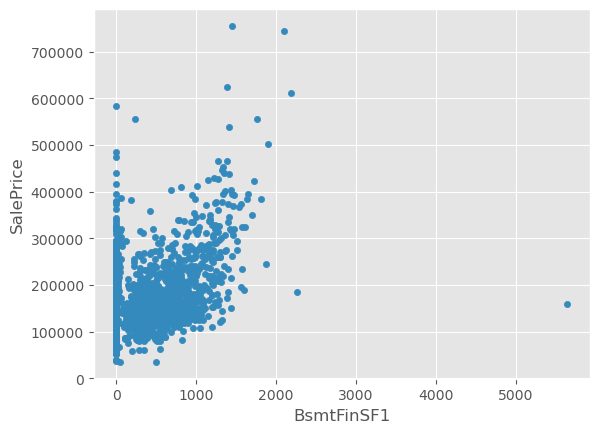

In [42]:
# 분포를 시각화 하기
all_df.plot.scatter(x = "BsmtFinSF1", y = "SalePrice")

In [43]:
all_df[all_df.BsmtFinSF1 > 5000] 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


In [44]:
all_df[all_df.TotalBsmtSF > 6000] 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


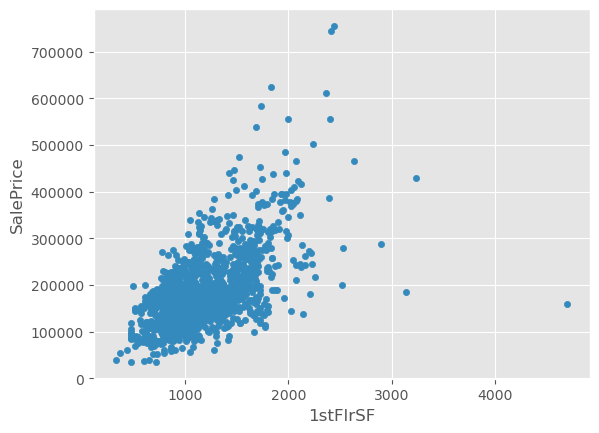

In [45]:
all_df.plot.scatter(x = "1stFlrSF", y = "SalePrice")

In [46]:
all_df[all_df["1stFlrSF"] > 4000] 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


위의 값들을 보면 일반적으로 값이 증가할때마다 SalePrice도 같이 증가하는 것을 볼 수 있다.

다만 id가 1299인 집과 같이 이상치인 값들도 있다.

따라서 이러한 노이즈들을 줄이기 위해서 역치를 바련하여 이상치를 제외해야한다

단, 테스트 데이터의 경우는 이상치라고 제거해서는 안된다

In [47]:
all_df = all_df[(all_df["BsmtFinSF1"] < 2000) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["TotalBsmtSF"] < 3000) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["GrLivArea"] < 4500) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["1stFlrSF"] < 2500) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["LotArea"] < 100000) | (all_df["SalePrice"].isnull())]

In [48]:
# 사전 처리를 한 후 RMSE다시 계산하기
categories = categories.drop(["PoolQC", "MiscFeature", "Alley"])

In [49]:
for cat in categories:
    le = LabelEncoder()
    
    all_df[cat].fillna("missing", inplace = True) # 비어있는것 missing으로 채우기
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,4,0,2,2008,8,4,208500.0,0
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,4,0,5,2007,8,4,181500.0,0
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,4,0,9,2008,8,4,223500.0,0
3,4,70,3,60.0,9550,1,0,3,0,0,...,0,0,4,0,2,2006,8,0,140000.0,0
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,4,0,12,2008,8,4,250000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,3,3,0,4,...,0,0,4,0,6,2006,8,4,NaN,0
2915,2916,160,4,21.0,1894,1,3,3,0,4,...,0,0,4,0,4,2006,8,0,NaN,0
2916,2917,20,3,160.0,20000,1,3,3,0,4,...,0,0,4,0,9,2006,8,0,NaN,0
2917,2918,85,3,62.0,10441,1,3,3,0,4,...,0,0,2,700,7,2006,8,4,NaN,1


In [50]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le.SalePrice)
train_X = train_df_le.drop(["SalePrice", "SalePrice_log"], axis = 1)
train_Y = train_df_le["SalePrice_log"]

In [51]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_idx, val_idx, in kf.split(train_X):
    X_train = train_X.iloc[train_idx]
    X_valid = train_X.iloc[val_idx]
    y_train = train_Y.iloc[train_idx]
    y_valid = train_Y.iloc[val_idx]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets = lgb_eval,
                          num_boost_round = 100,
                          early_stopping_rounds = 20,
                          verbose_eval = 10
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0424478
[20]	valid_0's l2: 0.0219416
[30]	valid_0's l2: 0.0176967
[40]	valid_0's l2: 0.0165897
[50]	valid_0's l2: 0.016335
[60]	valid_0's l2: 0.0164939
[70]	valid_0's l2: 0.0165732
Early stopping, best iteration is:
[52]	valid_0's l2: 0.0163158
0.010808676189679081
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0475601
[20]	valid_0's l2: 0.0268707
[30]	valid_0's l2: 0.0218638
[40]	valid_0's l2: 0.0205451
[50]	valid_0's l2: 0.0201464
[60]	valid_0's l2: 0.0198268
[70]	valid_0's l2: 0.0196627
[80]	valid_0's l2: 0.0194679
[90]	valid_0's l2: 0.0194081
[100]	valid_0's l2: 0.0193878
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.0193878
0.011930865213652284
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0369594
[20]	valid_0's l2: 0.0198952
[30]	valid_0's l2: 0.0166608
[40]	valid_0's l2: 0.0159843
[50]	valid_0's l2: 0.015

In [52]:
sum(rmses) / len(rmses)

0.011075195297470206

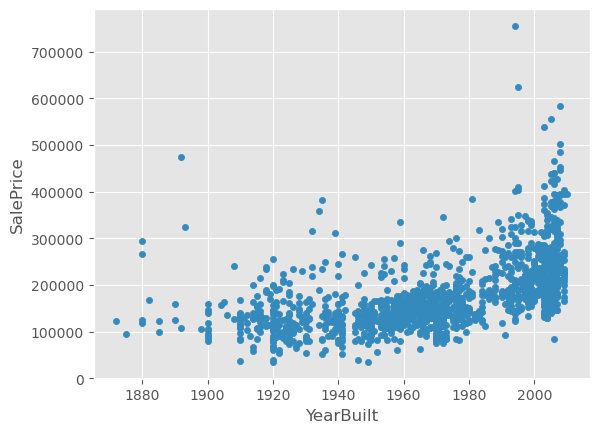

In [53]:
all_df.plot.scatter(x = "YearBuilt", y = "SalePrice")

In [54]:
# 시간과 관련된 변수의 통계량 확인
all_df[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,2904.000000,2904.000000,2745.000000,2904.000000
mean,1971.234504,1984.217975,1978.061202,2007.792011
std,30.319059,20.907346,25.600996,1.316366
min,1872.000000,1950.000000,1895.000000,2006.000000
25%,1953.000000,1965.000000,1960.000000,2007.000000
50%,1973.000000,1993.000000,1979.000000,2008.000000
75%,2001.000000,2004.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2207.000000,2010.000000


In [55]:
# 시간 변수로 새로운 특징 값 작성하기
all_df["Age"] = all_df["YrSold"] - all_df["YearBuilt"]

In [56]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le.SalePrice)
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis = 1)
train_Y = train_df_le["SalePrice_log"]

In [57]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_idx, val_idx, in kf.split(train_X):
    X_train = train_X.iloc[train_idx]
    X_valid = train_X.iloc[val_idx]
    y_train = train_Y.iloc[train_idx]
    y_valid = train_Y.iloc[val_idx]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets = lgb_eval,
                          num_boost_round = 100,
                          early_stopping_rounds = 20,
                          verbose_eval = 10
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0427712
[20]	valid_0's l2: 0.0222468
[30]	valid_0's l2: 0.0177147
[40]	valid_0's l2: 0.016571
[50]	valid_0's l2: 0.0161945
[60]	valid_0's l2: 0.0161879
[70]	valid_0's l2: 0.0161968
Early stopping, best iteration is:
[58]	valid_0's l2: 0.0161388
0.010748270211118627
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0474374
[20]	valid_0's l2: 0.027474
[30]	valid_0's l2: 0.0225527
[40]	valid_0's l2: 0.0207551
[50]	valid_0's l2: 0.0202749
[60]	valid_0's l2: 0.0200399
[70]	valid_0's l2: 0.0198921
[80]	valid_0's l2: 0.0198431
[90]	valid_0's l2: 0.0197761
[100]	valid_0's l2: 0.019663
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.019663
0.012016938250550077
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0369248
[20]	valid_0's l2: 0.0195778
[30]	valid_0's l2: 0.016538
[40]	valid_0's l2: 0.0153916
[50]	valid_0's l2: 0.0149941

In [58]:
sum(rmses) / len(rmses)

0.010992551133542116

In [59]:
# 넓이 변수로 새로운 특징 값 작성하기
all_df["TotalSF"] = all_df["TotalBsmtSF"] + all_df["1stFlrSF"] + all_df["2ndFlrSF"]
all_df["Total_Bathrooms"] = all_df["FullBath"] + all_df["HalfBath"] + all_df["BsmtFullBath"] + all_df["BsmtHalfBath"]
all_df["Total_PorchSF"] = all_df["WoodDeckSF"] + all_df["OpenPorchSF"] + all_df["EnclosedPorch"] + all_df["3SsnPorch"] + all_df["ScreenPorch"]
all_df["hasPorch"] = all_df["Total_PorchSF"].apply(lambda x: 1 if x > 0 else 0)
all_df = all_df.drop("Total_PorchSF", axis = 1)

In [60]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le.SalePrice)
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis = 1)
train_Y = train_df_le["SalePrice_log"]

In [61]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_idx, val_idx, in kf.split(train_X):
    X_train = train_X.iloc[train_idx]
    X_valid = train_X.iloc[val_idx]
    y_train = train_Y.iloc[train_idx]
    y_valid = train_Y.iloc[val_idx]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets = lgb_eval,
                          num_boost_round = 100,
                          early_stopping_rounds = 20,
                          verbose_eval = 10
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0388049
[20]	valid_0's l2: 0.0199263
[30]	valid_0's l2: 0.0165969
[40]	valid_0's l2: 0.0158728
[50]	valid_0's l2: 0.0157388
[60]	valid_0's l2: 0.015844
Early stopping, best iteration is:
[49]	valid_0's l2: 0.0157164
0.010603767001118647
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0459281
[20]	valid_0's l2: 0.0262784
[30]	valid_0's l2: 0.0217831
[40]	valid_0's l2: 0.0205294
[50]	valid_0's l2: 0.0201039
[60]	valid_0's l2: 0.0198874
[70]	valid_0's l2: 0.019815
[80]	valid_0's l2: 0.0198968
Early stopping, best iteration is:
[65]	valid_0's l2: 0.0197659
0.012054960551060236
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0354828
[20]	valid_0's l2: 0.0183241
[30]	valid_0's l2: 0.0154847
[40]	valid_0's l2: 0.0145868
[50]	valid_0's l2: 0.0143982
[60]	valid_0's l2: 0.0142851
[70]	valid_0's l2: 0.0144113
Early stopping, best iteration is:
[56]	

In [62]:
sum(rmses) / len(rmses)

0.010888222337141826

In [63]:
# 하이퍼파라미터 최적화
# 하이퍼파라미터 튜닝용 패키지인 Optuna 사용
import optuna

#### optuna 사용 방법
1. 모델의 학습 흐름과 개선하려는 정확도 설정
2. 조정하고자 하는 모델의 하이퍼파라미터 및 탐색 범위 설정
3. 실행 횟수를 정하여 최적화 실행

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size = 0.2, random_state = 1234, shuffle = False, stratify = None)


In [65]:
def objective(trial):
    params = {
        "objective" : "regression",
        "random_seed" : 1234,
        "learning_rate" : 0.05,
        "n_estimators" : 1000,
        "num_leaves" : trial.suggest_int("num_leaves", 4, 64),
        "max_bin" : trial.suggest_int("max_bin", 50, 200),
        "bagging_fraction" : trial.suggest_uniform("bagging_fraction", 0.4, 0.9),
        "bagging_freq" : trial.suggest_int("bagging_freq", 1, 10),
        "feature_fraction" : trial.suggest_uniform("feature_fraction", 0.4, 0.9),
        "min_data_in_leaf" : trial.suggest_int("min_data_in_leaf", 2, 16),
        "min_sum_hessian_in_leaf" : trial.suggest_int("min_sum_hessian_in_leaf", 1, 10)
    }
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)
    
    model_lgb = lgb.train(params,                        
                          lgb_train,
                          valid_sets = lgb_eval,
                          num_boost_round = 100,
                          early_stopping_rounds = 20,
                          verbose_eval = 10
                          )
    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return score

In [66]:
study = optuna.create_study(sampler = optuna.samplers.RandomSampler(seed = 0))
study.optimize(objective, n_trials=50)
study.best_params

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0644453
[20]	valid_0's l2: 0.0346719
[30]	valid_0's l2: 0.0229928
[40]	valid_0's l2: 0.0183839
[50]	valid_0's l2: 0.0164485
[60]	valid_0's l2: 0.0158134
[70]	valid_0's l2: 0.0153812
[80]	valid_0's l2: 0.0153182
[90]	valid_0's l2: 0.0151096
[100]	valid_0's l2: 0.0151073
[110]	valid_0's l2: 0.0150511
[120]	valid_0's l2: 0.0149346
[130]	valid_0's l2: 0.0148636
[140]	valid_0's l2: 0.0147796
[150]	valid_0's l2: 0.0148595
[160]	valid_0's l2: 0.014924
Early stopping, best iteration is:
[143]	valid_0's l2: 0.0147637


[I 2023-09-14 14:59:59,976] Trial 0 finished with value: 0.12150601255773774 and parameters: {'num_leaves': 48, 'max_bin': 97, 'bagging_fraction': 0.7575946831862097, 'bagging_freq': 4, 'feature_fraction': 0.8289728088113784, 'min_data_in_leaf': 9, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.12150601255773774.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0661297
[20]	valid_0's l2: 0.0364927
[30]	valid_0's l2: 0.024492
[40]	valid_0's l2: 0.0194053
[50]	valid_0's l2: 0.0171789
[60]	valid_0's l2: 0.0158782
[70]	valid_0's l2: 0.0154508
[80]	valid_0's l2: 0.0152727
[90]	valid_0's l2: 0.0149035
[100]	valid_0's l2: 0.0149601
[110]	valid_0's l2: 0.014827
[120]	valid_0's l2: 0.0147161
[130]	valid_0's l2: 0.0147828
[140]	valid_0's l2: 0.0147325
Early stopping, best iteration is:
[120]	valid_0's l2: 0.0147161


[I 2023-09-14 15:00:00,355] Trial 1 finished with value: 0.12131003846537722 and parameters: {'num_leaves': 23, 'max_bin': 71, 'bagging_fraction': 0.5921908536463499, 'bagging_freq': 8, 'feature_fraction': 0.8458865003910399, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 2}. Best is trial 1 with value: 0.12131003846537722.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0662746
[20]	valid_0's l2: 0.0368565
[30]	valid_0's l2: 0.024751
[40]	valid_0's l2: 0.0195547
[50]	valid_0's l2: 0.0174197
[60]	valid_0's l2: 0.0163875
[70]	valid_0's l2: 0.015933
[80]	valid_0's l2: 0.0156954
[90]	valid_0's l2: 0.0154655
[100]	valid_0's l2: 0.0152547
[110]	valid_0's l2: 0.0151491
[120]	valid_0's l2: 0.0150591
[130]	valid_0's l2: 0.0150302


[I 2023-09-14 15:00:00,856] Trial 2 finished with value: 0.12225751956786374 and parameters: {'num_leaves': 42, 'max_bin': 89, 'bagging_fraction': 0.6644474598764523, 'bagging_freq': 9, 'feature_fraction': 0.5963923980504149, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 9}. Best is trial 1 with value: 0.12131003846537722.


[140]	valid_0's l2: 0.0149726
[150]	valid_0's l2: 0.0149584
[160]	valid_0's l2: 0.0149943
[170]	valid_0's l2: 0.0149593
Early stopping, best iteration is:
[151]	valid_0's l2: 0.0149469
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.072307
[20]	valid_0's l2: 0.0425346
[30]	valid_0's l2: 0.0291234
[40]	valid_0's l2: 0.0223009
[50]	valid_0's l2: 0.0190642
[60]	valid_0's l2: 0.0173277
[70]	valid_0's l2: 0.0165373
[80]	valid_0's l2: 0.0159175
[90]	valid_0's l2: 0.0156084
[100]	valid_0's l2: 0.0155277
[110]	valid_0's l2: 0.0151774
[120]	valid_0's l2: 0.0152849
[130]	valid_0's l2: 0.0151118
[140]	valid_0's l2: 0.0150285
[150]	valid_0's l2: 0.0151008
Early stopping, best iteration is:
[137]	valid_0's l2: 0.0150026


[I 2023-09-14 15:00:01,257] Trial 3 finished with value: 0.12248516276675576 and parameters: {'num_leaves': 13, 'max_bin': 198, 'bagging_fraction': 0.4101091987201629, 'bagging_freq': 4, 'feature_fraction': 0.8785775794765232, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 3}. Best is trial 1 with value: 0.12131003846537722.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0650373
[20]	valid_0's l2: 0.0363107
[30]	valid_0's l2: 0.0244501
[40]	valid_0's l2: 0.0198025
[50]	valid_0's l2: 0.0177966
[60]	valid_0's l2: 0.0167476
[70]	valid_0's l2: 0.0164674
[80]	valid_0's l2: 0.0164444
[90]	valid_0's l2: 0.0162538
[100]	valid_0's l2: 0.0160166
[110]	valid_0's l2: 0.0159269
[120]	valid_0's l2: 0.0158368
[130]	valid_0's l2: 0.0158173
[140]	valid_0's l2: 0.0156764
[150]	valid_0's l2: 0.0156522
[160]	valid_0's l2: 0.015692
[170]	valid_0's l2: 0.015646
[180]	valid_0's l2: 0.0156729
Early stopping, best iteration is:
[168]	valid_0's l2: 0.0156367


[I 2023-09-14 15:00:01,848] Trial 4 finished with value: 0.12504690181167216 and parameters: {'num_leaves': 39, 'max_bin': 79, 'bagging_fraction': 0.7902645881432278, 'bagging_freq': 8, 'feature_fraction': 0.7199605106637619, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 10}. Best is trial 1 with value: 0.12131003846537722.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0667217
[20]	valid_0's l2: 0.0372156
[30]	valid_0's l2: 0.0243225
[40]	valid_0's l2: 0.0194219
[50]	valid_0's l2: 0.0163586
[60]	valid_0's l2: 0.015125
[70]	valid_0's l2: 0.0145387
[80]	valid_0's l2: 0.0142572
[90]	valid_0's l2: 0.0139458
[100]	valid_0's l2: 0.0138576
[110]	valid_0's l2: 0.0137059
[120]	valid_0's l2: 0.0135565
[130]	valid_0's l2: 0.0135288
[140]	valid_0's l2: 0.0136327
[150]	valid_0's l2: 0.0138249
Early stopping, best iteration is:
[137]	valid_0's l2: 0.0134481


[I 2023-09-14 15:00:02,231] Trial 5 finished with value: 0.11596607104153678 and parameters: {'num_leaves': 36, 'max_bin': 81, 'bagging_fraction': 0.4529538035938961, 'bagging_freq': 8, 'feature_fraction': 0.5322778060523135, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 3}. Best is trial 5 with value: 0.11596607104153678.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0658682
[20]	valid_0's l2: 0.0361161
[30]	valid_0's l2: 0.0238759
[40]	valid_0's l2: 0.0188532
[50]	valid_0's l2: 0.0165141
[60]	valid_0's l2: 0.0157701
[70]	valid_0's l2: 0.0153666
[80]	valid_0's l2: 0.0151843
[90]	valid_0's l2: 0.0151227


[I 2023-09-14 15:00:02,743] Trial 6 finished with value: 0.12231438176224405 and parameters: {'num_leaves': 59, 'max_bin': 78, 'bagging_fraction': 0.6842169744343243, 'bagging_freq': 1, 'feature_fraction': 0.5620705038966071, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 7}. Best is trial 5 with value: 0.11596607104153678.


[100]	valid_0's l2: 0.0150021
[110]	valid_0's l2: 0.01497
[120]	valid_0's l2: 0.0150746
[130]	valid_0's l2: 0.0150447
Early stopping, best iteration is:
[114]	valid_0's l2: 0.0149608
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0652228
[20]	valid_0's l2: 0.0354877
[30]	valid_0's l2: 0.0237628
[40]	valid_0's l2: 0.0191183
[50]	valid_0's l2: 0.0171193
[60]	valid_0's l2: 0.0163709
[70]	valid_0's l2: 0.0159234
[80]	valid_0's l2: 0.0155418
[90]	valid_0's l2: 0.0154281
[100]	valid_0's l2: 0.0152765
[110]	valid_0's l2: 0.0151799
[120]	valid_0's l2: 0.0150207


[I 2023-09-14 15:00:03,232] Trial 7 finished with value: 0.12248521179298734 and parameters: {'num_leaves': 44, 'max_bin': 67, 'bagging_fraction': 0.8718740392573121, 'bagging_freq': 10, 'feature_fraction': 0.6249749949556138, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 2}. Best is trial 5 with value: 0.11596607104153678.


[130]	valid_0's l2: 0.0150761
[140]	valid_0's l2: 0.0150905
Early stopping, best iteration is:
[122]	valid_0's l2: 0.0150026


[I 2023-09-14 15:00:03,564] Trial 8 finished with value: 0.11802956992636056 and parameters: {'num_leaves': 5, 'max_bin': 107, 'bagging_fraction': 0.7333833577228339, 'bagging_freq': 8, 'feature_fraction': 0.4854547925680226, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 1}. Best is trial 5 with value: 0.11596607104153678.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0789856
[20]	valid_0's l2: 0.0488433
[30]	valid_0's l2: 0.0342554
[40]	valid_0's l2: 0.0270374
[50]	valid_0's l2: 0.0228565
[60]	valid_0's l2: 0.0204885
[70]	valid_0's l2: 0.0188501
[80]	valid_0's l2: 0.0180382
[90]	valid_0's l2: 0.0172677
[100]	valid_0's l2: 0.0166854
[110]	valid_0's l2: 0.0162546
[120]	valid_0's l2: 0.0157851
[130]	valid_0's l2: 0.0154066
[140]	valid_0's l2: 0.0150226
[150]	valid_0's l2: 0.0148389
[160]	valid_0's l2: 0.0147465
[170]	valid_0's l2: 0.0146187
[180]	valid_0's l2: 0.014575
[190]	valid_0's l2: 0.0144312
[200]	valid_0's l2: 0.014322
[210]	valid_0's l2: 0.014275
[220]	valid_0's l2: 0.0142597
[230]	valid_0's l2: 0.0142531
[240]	valid_0's l2: 0.014207
[250]	valid_0's l2: 0.0142104
[260]	valid_0's l2: 0.0141796
[270]	valid_0's l2: 0.0141457
[280]	valid_0's l2: 0.0141826
[290]	valid_0's l2: 0.0141146
[300]	valid_0's l2: 0.0140392
[310]	valid_0's l2: 0.0139877
[320]	valid_0's l2: 0.

[I 2023-09-14 15:00:03,897] Trial 9 finished with value: 0.11626099537720772 and parameters: {'num_leaves': 18, 'max_bin': 149, 'bagging_fraction': 0.5818553854713113, 'bagging_freq': 10, 'feature_fraction': 0.4192127132363674, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 5}. Best is trial 5 with value: 0.11596607104153678.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0678227
[20]	valid_0's l2: 0.0381911
[30]	valid_0's l2: 0.025576
[40]	valid_0's l2: 0.0199392
[50]	valid_0's l2: 0.0175218
[60]	valid_0's l2: 0.0164166
[70]	valid_0's l2: 0.0154683
[80]	valid_0's l2: 0.0150645
[90]	valid_0's l2: 0.0144215
[100]	valid_0's l2: 0.0139937
[110]	valid_0's l2: 0.0138632
[120]	valid_0's l2: 0.0135727
[130]	valid_0's l2: 0.0135404
[140]	valid_0's l2: 0.0135701
Early stopping, best iteration is:
[127]	valid_0's l2: 0.0135166


[I 2023-09-14 15:00:04,190] Trial 10 finished with value: 0.12177856839423287 and parameters: {'num_leaves': 10, 'max_bin': 97, 'bagging_fraction': 0.5044383780474173, 'bagging_freq': 4, 'feature_fraction': 0.8976497838389439, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 9}. Best is trial 5 with value: 0.11596607104153678.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0714911
[20]	valid_0's l2: 0.042169
[30]	valid_0's l2: 0.0289754
[40]	valid_0's l2: 0.0232127
[50]	valid_0's l2: 0.0194404
[60]	valid_0's l2: 0.0177576
[70]	valid_0's l2: 0.0168979
[80]	valid_0's l2: 0.0160823
[90]	valid_0's l2: 0.015528
[100]	valid_0's l2: 0.0152136
[110]	valid_0's l2: 0.0149543
[120]	valid_0's l2: 0.0148637
[130]	valid_0's l2: 0.0148914
Early stopping, best iteration is:
[117]	valid_0's l2: 0.01483
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0664527
[20]	valid_0's l2: 0.0367546
[30]	valid_0's l2: 0.0247403
[40]	valid_0's l2: 0.0192415
[50]	valid_0's l2: 0.0165369
[60]	valid_0's l2: 0.0152495
[70]	valid_0's l2: 0.014694
[80]	valid_0's l2: 0.014408
[90]	valid_0's l2: 0.0138706
[100]	valid_0's l2: 0.0136797
[110]	valid_0's l2: 0.0134622
[120]	valid_0's l2: 0.013388
[130]	valid_0's l2: 0.0133717


[I 2023-09-14 15:00:04,681] Trial 11 finished with value: 0.11464467963922359 and parameters: {'num_leaves': 18, 'max_bin': 193, 'bagging_fraction': 0.6373487511442064, 'bagging_freq': 8, 'feature_fraction': 0.5690038074194459, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 6}. Best is trial 11 with value: 0.11464467963922359.


[140]	valid_0's l2: 0.0132406
[150]	valid_0's l2: 0.0131517
[160]	valid_0's l2: 0.0132512
[170]	valid_0's l2: 0.0132161
Early stopping, best iteration is:
[152]	valid_0's l2: 0.0131434
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0647588
[20]	valid_0's l2: 0.0349529
[30]	valid_0's l2: 0.0234016
[40]	valid_0's l2: 0.0187859
[50]	valid_0's l2: 0.0167537
[60]	valid_0's l2: 0.0160306
[70]	valid_0's l2: 0.0157692
[80]	valid_0's l2: 0.0155564
[90]	valid_0's l2: 0.0154147
[100]	valid_0's l2: 0.0153648


[I 2023-09-14 15:00:05,231] Trial 12 finished with value: 0.12299120674513038 and parameters: {'num_leaves': 52, 'max_bin': 99, 'bagging_fraction': 0.7891727410129545, 'bagging_freq': 4, 'feature_fraction': 0.5843625853304821, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 11 with value: 0.11464467963922359.


[110]	valid_0's l2: 0.015269
[120]	valid_0's l2: 0.0153152
[130]	valid_0's l2: 0.0152061
[140]	valid_0's l2: 0.0151373
[150]	valid_0's l2: 0.0151351
[160]	valid_0's l2: 0.0151699
Early stopping, best iteration is:
[146]	valid_0's l2: 0.0151268
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0682911
[20]	valid_0's l2: 0.0386168
[30]	valid_0's l2: 0.0255963
[40]	valid_0's l2: 0.0202429
[50]	valid_0's l2: 0.0172591
[60]	valid_0's l2: 0.016061
[70]	valid_0's l2: 0.0154452
[80]	valid_0's l2: 0.0148408
[90]	valid_0's l2: 0.0143672
[100]	valid_0's l2: 0.0141245
[110]	valid_0's l2: 0.0139113
[120]	valid_0's l2: 0.0138742
[130]	valid_0's l2: 0.0137386
[140]	valid_0's l2: 0.0134668
[150]	valid_0's l2: 0.0134914
[160]	valid_0's l2: 0.0134709
[170]	valid_0's l2: 0.0134531
[180]	valid_0's l2: 0.0135034
Early stopping, best iteration is:
[166]	valid_0's l2: 0.0134162


[I 2023-09-14 15:00:05,635] Trial 13 finished with value: 0.11582826509967235 and parameters: {'num_leaves': 53, 'max_bin': 86, 'bagging_fraction': 0.44804920394698156, 'bagging_freq': 4, 'feature_fraction': 0.6343256008238508, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 1}. Best is trial 11 with value: 0.11464467963922359.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0644719
[20]	valid_0's l2: 0.0351206
[30]	valid_0's l2: 0.0232815
[40]	valid_0's l2: 0.0184748
[50]	valid_0's l2: 0.0161143
[60]	valid_0's l2: 0.0151587
[70]	valid_0's l2: 0.0147519
[80]	valid_0's l2: 0.014519
[90]	valid_0's l2: 0.0142902
[100]	valid_0's l2: 0.0141442
[110]	valid_0's l2: 0.01401
[120]	valid_0's l2: 0.0139561


[I 2023-09-14 15:00:06,105] Trial 14 finished with value: 0.11812293015554068 and parameters: {'num_leaves': 43, 'max_bin': 199, 'bagging_fraction': 0.7696317896991509, 'bagging_freq': 1, 'feature_fraction': 0.6208554606244228, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 8}. Best is trial 11 with value: 0.11464467963922359.


[130]	valid_0's l2: 0.0139829
[140]	valid_0's l2: 0.0140516
Early stopping, best iteration is:
[121]	valid_0's l2: 0.013953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0638841
[20]	valid_0's l2: 0.0339779
[30]	valid_0's l2: 0.0225596
[40]	valid_0's l2: 0.0184035
[50]	valid_0's l2: 0.0165817
[60]	valid_0's l2: 0.0161595
[70]	valid_0's l2: 0.0158894
[80]	valid_0's l2: 0.0158307
[90]	valid_0's l2: 0.015809
[100]	valid_0's l2: 0.0157549
[110]	valid_0's l2: 0.015725
[120]	valid_0's l2: 0.0158
Early stopping, best iteration is:
[105]	valid_0's l2: 0.0157124


[I 2023-09-14 15:00:06,739] Trial 15 finished with value: 0.1253490842443302 and parameters: {'num_leaves': 63, 'max_bin': 180, 'bagging_fraction': 0.7443305914028853, 'bagging_freq': 4, 'feature_fraction': 0.8591177331810724, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 3}. Best is trial 11 with value: 0.11464467963922359.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.065279
[20]	valid_0's l2: 0.0361918
[30]	valid_0's l2: 0.0241108
[40]	valid_0's l2: 0.0196212
[50]	valid_0's l2: 0.0176163
[60]	valid_0's l2: 0.0169168
[70]	valid_0's l2: 0.0165423


[I 2023-09-14 15:00:07,255] Trial 16 finished with value: 0.12561994654036585 and parameters: {'num_leaves': 50, 'max_bin': 198, 'bagging_fraction': 0.5326947454697227, 'bagging_freq': 10, 'feature_fraction': 0.8605788051185999, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 7}. Best is trial 11 with value: 0.11464467963922359.


[80]	valid_0's l2: 0.0161703
[90]	valid_0's l2: 0.0157843
[100]	valid_0's l2: 0.0158959
Early stopping, best iteration is:
[89]	valid_0's l2: 0.0157804
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0653738
[20]	valid_0's l2: 0.0360453
[30]	valid_0's l2: 0.0233497
[40]	valid_0's l2: 0.0186064
[50]	valid_0's l2: 0.0163116
[60]	valid_0's l2: 0.0156508
[70]	valid_0's l2: 0.0152604
[80]	valid_0's l2: 0.0148986
[90]	valid_0's l2: 0.0148414
[100]	valid_0's l2: 0.0148648
[110]	valid_0's l2: 0.0148032
[120]	valid_0's l2: 0.0147981
[130]	valid_0's l2: 0.0147527
[140]	valid_0's l2: 0.0146986
[150]	valid_0's l2: 0.0146746
[160]	valid_0's l2: 0.0147096


[I 2023-09-14 15:00:07,992] Trial 17 finished with value: 0.12110485246026054 and parameters: {'num_leaves': 47, 'max_bin': 154, 'bagging_fraction': 0.7337051899818409, 'bagging_freq': 4, 'feature_fraction': 0.7235870700937778, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 1}. Best is trial 11 with value: 0.11464467963922359.


[170]	valid_0's l2: 0.0147247
Early stopping, best iteration is:
[153]	valid_0's l2: 0.0146664
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0683102
[20]	valid_0's l2: 0.0383142
[30]	valid_0's l2: 0.0250482
[40]	valid_0's l2: 0.0192429
[50]	valid_0's l2: 0.0162499
[60]	valid_0's l2: 0.0148215
[70]	valid_0's l2: 0.0143226
[80]	valid_0's l2: 0.0139907
[90]	valid_0's l2: 0.0138333
[100]	valid_0's l2: 0.0138429
[110]	valid_0's l2: 0.0137528
[120]	valid_0's l2: 0.0137192
[130]	valid_0's l2: 0.013606
[140]	valid_0's l2: 0.0135771


[I 2023-09-14 15:00:08,568] Trial 18 finished with value: 0.11578457494314925 and parameters: {'num_leaves': 42, 'max_bin': 69, 'bagging_fraction': 0.5989103763793145, 'bagging_freq': 4, 'feature_fraction': 0.4100537730937468, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 11 with value: 0.11464467963922359.


[150]	valid_0's l2: 0.0135738
[160]	valid_0's l2: 0.0136622
[170]	valid_0's l2: 0.0135778
[180]	valid_0's l2: 0.0134993
[190]	valid_0's l2: 0.0134348
[200]	valid_0's l2: 0.0134121
[210]	valid_0's l2: 0.0134607
Early stopping, best iteration is:
[197]	valid_0's l2: 0.0134061


[I 2023-09-14 15:00:08,893] Trial 19 finished with value: 0.11669915316547477 and parameters: {'num_leaves': 6, 'max_bin': 53, 'bagging_fraction': 0.7518686396449581, 'bagging_freq': 1, 'feature_fraction': 0.5243765717599791, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 9}. Best is trial 11 with value: 0.11464467963922359.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0765542
[20]	valid_0's l2: 0.046658
[30]	valid_0's l2: 0.0318115
[40]	valid_0's l2: 0.0248099
[50]	valid_0's l2: 0.021008
[60]	valid_0's l2: 0.0189471
[70]	valid_0's l2: 0.0176464
[80]	valid_0's l2: 0.016679
[90]	valid_0's l2: 0.0159377
[100]	valid_0's l2: 0.0154426
[110]	valid_0's l2: 0.0149517
[120]	valid_0's l2: 0.0145488
[130]	valid_0's l2: 0.0142512
[140]	valid_0's l2: 0.0140194
[150]	valid_0's l2: 0.0138275
[160]	valid_0's l2: 0.0137898
[170]	valid_0's l2: 0.0136495
[180]	valid_0's l2: 0.0136394
[190]	valid_0's l2: 0.0136426
Early stopping, best iteration is:
[173]	valid_0's l2: 0.0136187
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.067084
[20]	valid_0's l2: 0.0369499
[30]	valid_0's l2: 0.024934
[40]	valid_0's l2: 0.0199207
[50]	valid_0's l2: 0.0176687
[60]	valid_0's l2: 0.0166228
[70]	valid_0's l2: 0.0160923
[80]	valid_0's l2: 0.0156427
[90]	valid_0's l2: 0.0152

[I 2023-09-14 15:00:09,377] Trial 20 finished with value: 0.12195131580079281 and parameters: {'num_leaves': 30, 'max_bin': 117, 'bagging_fraction': 0.8763745057584925, 'bagging_freq': 1, 'feature_fraction': 0.8232043362355639, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 7}. Best is trial 11 with value: 0.11464467963922359.


[130]	valid_0's l2: 0.0149175
[140]	valid_0's l2: 0.0149975
Early stopping, best iteration is:
[127]	valid_0's l2: 0.0148721


[I 2023-09-14 15:00:09,725] Trial 21 finished with value: 0.11771529756547398 and parameters: {'num_leaves': 17, 'max_bin': 171, 'bagging_fraction': 0.5982528704234924, 'bagging_freq': 9, 'feature_fraction': 0.5248981378274891, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 6}. Best is trial 11 with value: 0.11464467963922359.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0681442
[20]	valid_0's l2: 0.0380085
[30]	valid_0's l2: 0.0261107
[40]	valid_0's l2: 0.0205652
[50]	valid_0's l2: 0.0178882
[60]	valid_0's l2: 0.0163991
[70]	valid_0's l2: 0.0156208
[80]	valid_0's l2: 0.0152031
[90]	valid_0's l2: 0.0148149
[100]	valid_0's l2: 0.0143546
[110]	valid_0's l2: 0.0143187
[120]	valid_0's l2: 0.014294
[130]	valid_0's l2: 0.0140974
[140]	valid_0's l2: 0.0139447
[150]	valid_0's l2: 0.0138867
[160]	valid_0's l2: 0.0139874
[170]	valid_0's l2: 0.0138913
Early stopping, best iteration is:
[152]	valid_0's l2: 0.0138569
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0652907
[20]	valid_0's l2: 0.0357185
[30]	valid_0's l2: 0.023637
[40]	valid_0's l2: 0.0183787
[50]	valid_0's l2: 0.0159621
[60]	valid_0's l2: 0.0152341
[70]	valid_0's l2: 0.0146963
[80]	valid_0's l2: 0.0144424
[90]	valid_0's l2: 0.0141676
[100]	valid_0's l2: 0.0140881
[110]	valid_0's l2: 0.0

[I 2023-09-14 15:00:10,147] Trial 22 finished with value: 0.11810123819665698 and parameters: {'num_leaves': 50, 'max_bin': 75, 'bagging_fraction': 0.6942325425343747, 'bagging_freq': 10, 'feature_fraction': 0.6506621909633512, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 11 with value: 0.11464467963922359.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0653486
[20]	valid_0's l2: 0.0357527
[30]	valid_0's l2: 0.0234618
[40]	valid_0's l2: 0.0186609
[50]	valid_0's l2: 0.0164558
[60]	valid_0's l2: 0.015532
[70]	valid_0's l2: 0.0150027
[80]	valid_0's l2: 0.0146242
[90]	valid_0's l2: 0.0142593
[100]	valid_0's l2: 0.0140016
[110]	valid_0's l2: 0.0137825
[120]	valid_0's l2: 0.013598
[130]	valid_0's l2: 0.0135491
[140]	valid_0's l2: 0.0136354
[150]	valid_0's l2: 0.0136129
Early stopping, best iteration is:
[130]	valid_0's l2: 0.0135491


[I 2023-09-14 15:00:10,558] Trial 23 finished with value: 0.11640072630512059 and parameters: {'num_leaves': 37, 'max_bin': 154, 'bagging_fraction': 0.6119275242790898, 'bagging_freq': 10, 'feature_fraction': 0.6350660946278825, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 8}. Best is trial 11 with value: 0.11464467963922359.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0646894
[20]	valid_0's l2: 0.0358401
[30]	valid_0's l2: 0.0243905
[40]	valid_0's l2: 0.019487
[50]	valid_0's l2: 0.0170248
[60]	valid_0's l2: 0.0159045
[70]	valid_0's l2: 0.0154386
[80]	valid_0's l2: 0.0150952
[90]	valid_0's l2: 0.0147025
[100]	valid_0's l2: 0.0144665
[110]	valid_0's l2: 0.0144876


[I 2023-09-14 15:00:11,008] Trial 24 finished with value: 0.12017586589543774 and parameters: {'num_leaves': 60, 'max_bin': 129, 'bagging_fraction': 0.7745849185763624, 'bagging_freq': 9, 'feature_fraction': 0.46773703211122514, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 7}. Best is trial 11 with value: 0.11464467963922359.


[120]	valid_0's l2: 0.0144498
Early stopping, best iteration is:
[101]	valid_0's l2: 0.0144422
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0649551
[20]	valid_0's l2: 0.0355597
[30]	valid_0's l2: 0.0237632
[40]	valid_0's l2: 0.0187361
[50]	valid_0's l2: 0.0161293
[60]	valid_0's l2: 0.0148479
[70]	valid_0's l2: 0.014515
[80]	valid_0's l2: 0.0143284
[90]	valid_0's l2: 0.0141536
[100]	valid_0's l2: 0.0140285
[110]	valid_0's l2: 0.0140421
[120]	valid_0's l2: 0.0140297
[130]	valid_0's l2: 0.0139782
[140]	valid_0's l2: 0.0139599
[150]	valid_0's l2: 0.0139157
[160]	valid_0's l2: 0.0139994
[170]	valid_0's l2: 0.0138541
[180]	valid_0's l2: 0.0138507
[190]	valid_0's l2: 0.0139618
Early stopping, best iteration is:
[178]	valid_0's l2: 0.0138366


[I 2023-09-14 15:00:11,556] Trial 25 finished with value: 0.11762913497604742 and parameters: {'num_leaves': 51, 'max_bin': 143, 'bagging_fraction': 0.6954363806240866, 'bagging_freq': 7, 'feature_fraction': 0.7266004099285668, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 9}. Best is trial 11 with value: 0.11464467963922359.
[I 2023-09-14 15:00:11,844] Trial 26 finished with value: 0.11783689830874759 and parameters: {'num_leaves': 7, 'max_bin': 53, 'bagging_fraction': 0.5837809350239482, 'bagging_freq': 7, 'feature_fraction': 0.8920211206820732, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 6}. Best is trial 11 with value: 0.11464467963922359.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.073876
[20]	valid_0's l2: 0.0448991
[30]	valid_0's l2: 0.030633
[40]	valid_0's l2: 0.0236322
[50]	valid_0's l2: 0.0200889
[60]	valid_0's l2: 0.0185025
[70]	valid_0's l2: 0.0173161
[80]	valid_0's l2: 0.0163032
[90]	valid_0's l2: 0.0155353
[100]	valid_0's l2: 0.0150329
[110]	valid_0's l2: 0.0148594
[120]	valid_0's l2: 0.0147283
[130]	valid_0's l2: 0.014425
[140]	valid_0's l2: 0.0141389
[150]	valid_0's l2: 0.0140683
[160]	valid_0's l2: 0.0139661
[170]	valid_0's l2: 0.0139219
[180]	valid_0's l2: 0.0139502
[190]	valid_0's l2: 0.0139822
Early stopping, best iteration is:
[172]	valid_0's l2: 0.0138855
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0665076
[20]	valid_0's l2: 0.0379625
[30]	valid_0's l2: 0.0248063
[40]	valid_0's l2: 0.0191257
[50]	valid_0's l2: 0.0166832
[60]	valid_0's l2: 0.0154993
[70]	valid_0's l2: 0.014824
[80]	valid_0's l2: 0.0147271
[90]	valid_0's l2: 0.014

[I 2023-09-14 15:00:12,268] Trial 27 finished with value: 0.11705125750464636 and parameters: {'num_leaves': 27, 'max_bin': 93, 'bagging_fraction': 0.4501134436561506, 'bagging_freq': 9, 'feature_fraction': 0.5761558306002665, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 6}. Best is trial 11 with value: 0.11464467963922359.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0690979
[20]	valid_0's l2: 0.038839
[30]	valid_0's l2: 0.0257802
[40]	valid_0's l2: 0.0202085
[50]	valid_0's l2: 0.0175784
[60]	valid_0's l2: 0.0160001
[70]	valid_0's l2: 0.0152639
[80]	valid_0's l2: 0.014858
[90]	valid_0's l2: 0.0145906
[100]	valid_0's l2: 0.0144111
[110]	valid_0's l2: 0.0142785
[120]	valid_0's l2: 0.0141321
[130]	valid_0's l2: 0.0141756
Early stopping, best iteration is:
[116]	valid_0's l2: 0.0141118


[I 2023-09-14 15:00:12,628] Trial 28 finished with value: 0.11879289801877395 and parameters: {'num_leaves': 32, 'max_bin': 161, 'bagging_fraction': 0.41877969191407016, 'bagging_freq': 4, 'feature_fraction': 0.48342375652424985, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 4}. Best is trial 11 with value: 0.11464467963922359.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0667989
[20]	valid_0's l2: 0.0372004
[30]	valid_0's l2: 0.0244432
[40]	valid_0's l2: 0.0189906
[50]	valid_0's l2: 0.0165253
[60]	valid_0's l2: 0.0153777
[70]	valid_0's l2: 0.0147821
[80]	valid_0's l2: 0.0145069
[90]	valid_0's l2: 0.0141592
[100]	valid_0's l2: 0.0142089
[110]	valid_0's l2: 0.0141247


[I 2023-09-14 15:00:13,088] Trial 29 finished with value: 0.11857315780780987 and parameters: {'num_leaves': 50, 'max_bin': 198, 'bagging_fraction': 0.6056983618777273, 'bagging_freq': 4, 'feature_fraction': 0.6035916486129999, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 10}. Best is trial 11 with value: 0.11464467963922359.


[120]	valid_0's l2: 0.0141019
[130]	valid_0's l2: 0.0140797
Early stopping, best iteration is:
[115]	valid_0's l2: 0.0140596
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0647043
[20]	valid_0's l2: 0.0365139
[30]	valid_0's l2: 0.0250051
[40]	valid_0's l2: 0.0204222
[50]	valid_0's l2: 0.0179251
[60]	valid_0's l2: 0.0168802
[70]	valid_0's l2: 0.0164681
[80]	valid_0's l2: 0.0161756
[90]	valid_0's l2: 0.0159636
[100]	valid_0's l2: 0.0158827
[110]	valid_0's l2: 0.015839


[I 2023-09-14 15:00:13,611] Trial 30 finished with value: 0.1252807753712493 and parameters: {'num_leaves': 45, 'max_bin': 181, 'bagging_fraction': 0.6100376848953053, 'bagging_freq': 3, 'feature_fraction': 0.8331911629643146, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 8}. Best is trial 11 with value: 0.11464467963922359.


[120]	valid_0's l2: 0.0158814
[130]	valid_0's l2: 0.0157547
[140]	valid_0's l2: 0.015705
[150]	valid_0's l2: 0.0157297
[160]	valid_0's l2: 0.0158459
Early stopping, best iteration is:
[141]	valid_0's l2: 0.0156953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0643937
[20]	valid_0's l2: 0.0346471
[30]	valid_0's l2: 0.0234274
[40]	valid_0's l2: 0.018684
[50]	valid_0's l2: 0.0166029
[60]	valid_0's l2: 0.0155719
[70]	valid_0's l2: 0.0152293
[80]	valid_0's l2: 0.0151915
[90]	valid_0's l2: 0.0150342
[100]	valid_0's l2: 0.0148662
[110]	valid_0's l2: 0.01489


[I 2023-09-14 15:00:14,071] Trial 31 finished with value: 0.12179691692240853 and parameters: {'num_leaves': 43, 'max_bin': 111, 'bagging_fraction': 0.7649952812120291, 'bagging_freq': 3, 'feature_fraction': 0.6605183031020647, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 6}. Best is trial 11 with value: 0.11464467963922359.


[120]	valid_0's l2: 0.0148562
Early stopping, best iteration is:
[102]	valid_0's l2: 0.0148345
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0660751
[20]	valid_0's l2: 0.0369693
[30]	valid_0's l2: 0.024459
[40]	valid_0's l2: 0.0195907
[50]	valid_0's l2: 0.0172118
[60]	valid_0's l2: 0.0157131
[70]	valid_0's l2: 0.0150727
[80]	valid_0's l2: 0.0147446
[90]	valid_0's l2: 0.0146102
[100]	valid_0's l2: 0.0146184
[110]	valid_0's l2: 0.0144241
[120]	valid_0's l2: 0.0143503
[130]	valid_0's l2: 0.0143305
Early stopping, best iteration is:
[117]	valid_0's l2: 0.0142056


[I 2023-09-14 15:00:14,475] Trial 32 finished with value: 0.11918724529575601 and parameters: {'num_leaves': 44, 'max_bin': 86, 'bagging_fraction': 0.48549329934156576, 'bagging_freq': 3, 'feature_fraction': 0.5119623440301901, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 11 with value: 0.11464467963922359.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0703525
[20]	valid_0's l2: 0.0413555
[30]	valid_0's l2: 0.0278927
[40]	valid_0's l2: 0.021847
[50]	valid_0's l2: 0.0186521
[60]	valid_0's l2: 0.0173875
[70]	valid_0's l2: 0.0165869
[80]	valid_0's l2: 0.015944
[90]	valid_0's l2: 0.015518
[100]	valid_0's l2: 0.0153518
[110]	valid_0's l2: 0.0152583
[120]	valid_0's l2: 0.0151453
[130]	valid_0's l2: 0.014931
[140]	valid_0's l2: 0.014808
[150]	valid_0's l2: 0.0146684
[160]	valid_0's l2: 0.0147359
[170]	valid_0's l2: 0.0146903
Early stopping, best iteration is:
[152]	valid_0's l2: 0.0146494


[I 2023-09-14 15:00:14,828] Trial 33 finished with value: 0.12103486593690077 and parameters: {'num_leaves': 12, 'max_bin': 179, 'bagging_fraction': 0.7918221226509443, 'bagging_freq': 4, 'feature_fraction': 0.7107392007498818, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 5}. Best is trial 11 with value: 0.11464467963922359.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0670102
[20]	valid_0's l2: 0.0376654
[30]	valid_0's l2: 0.0247357
[40]	valid_0's l2: 0.0196539
[50]	valid_0's l2: 0.0170263
[60]	valid_0's l2: 0.0156632
[70]	valid_0's l2: 0.0152699
[80]	valid_0's l2: 0.0148828
[90]	valid_0's l2: 0.014636
[100]	valid_0's l2: 0.0145736
[110]	valid_0's l2: 0.0144476
[120]	valid_0's l2: 0.0143566
[130]	valid_0's l2: 0.0141963
[140]	valid_0's l2: 0.0142201
[150]	valid_0's l2: 0.0142554
Early stopping, best iteration is:
[131]	valid_0's l2: 0.0141921


[I 2023-09-14 15:00:15,236] Trial 34 finished with value: 0.11913046604382962 and parameters: {'num_leaves': 40, 'max_bin': 75, 'bagging_fraction': 0.5336312689407392, 'bagging_freq': 4, 'feature_fraction': 0.8321407213431223, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 2}. Best is trial 11 with value: 0.11464467963922359.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0659368
[20]	valid_0's l2: 0.035869
[30]	valid_0's l2: 0.0239511
[40]	valid_0's l2: 0.0189283
[50]	valid_0's l2: 0.016703
[60]	valid_0's l2: 0.0156489
[70]	valid_0's l2: 0.0151507
[80]	valid_0's l2: 0.0148412
[90]	valid_0's l2: 0.0146612
[100]	valid_0's l2: 0.0145244
[110]	valid_0's l2: 0.0144968
[120]	valid_0's l2: 0.0144281
[130]	valid_0's l2: 0.0145461


[I 2023-09-14 15:00:15,672] Trial 35 finished with value: 0.12008922004909216 and parameters: {'num_leaves': 37, 'max_bin': 196, 'bagging_fraction': 0.6771212175422201, 'bagging_freq': 5, 'feature_fraction': 0.5049218744875611, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 6}. Best is trial 11 with value: 0.11464467963922359.


[140]	valid_0's l2: 0.0145308
Early stopping, best iteration is:
[121]	valid_0's l2: 0.0144214


[I 2023-09-14 15:00:15,989] Trial 36 finished with value: 0.12218044281160592 and parameters: {'num_leaves': 16, 'max_bin': 94, 'bagging_fraction': 0.7697753975246437, 'bagging_freq': 3, 'feature_fraction': 0.8851183415480504, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 8}. Best is trial 11 with value: 0.11464467963922359.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0680714
[20]	valid_0's l2: 0.0389141
[30]	valid_0's l2: 0.0259407
[40]	valid_0's l2: 0.0201287
[50]	valid_0's l2: 0.017688
[60]	valid_0's l2: 0.0163555
[70]	valid_0's l2: 0.0157102
[80]	valid_0's l2: 0.0154557
[90]	valid_0's l2: 0.0150564
[100]	valid_0's l2: 0.0149382
[110]	valid_0's l2: 0.0150381
[120]	valid_0's l2: 0.0149535
Early stopping, best iteration is:
[101]	valid_0's l2: 0.0149281
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0656136
[20]	valid_0's l2: 0.036633
[30]	valid_0's l2: 0.0248896
[40]	valid_0's l2: 0.0196644
[50]	valid_0's l2: 0.017671
[60]	valid_0's l2: 0.0166622
[70]	valid_0's l2: 0.0160753
[80]	valid_0's l2: 0.0158324
[90]	valid_0's l2: 0.0154717
[100]	valid_0's l2: 0.0154369
[110]	valid_0's l2: 0.0154414
[120]	valid_0's l2: 0.015457


[I 2023-09-14 15:00:16,414] Trial 37 finished with value: 0.12405835803877896 and parameters: {'num_leaves': 43, 'max_bin': 200, 'bagging_fraction': 0.6172083127790604, 'bagging_freq': 7, 'feature_fraction': 0.8405022811008375, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 4}. Best is trial 11 with value: 0.11464467963922359.


Early stopping, best iteration is:
[108]	valid_0's l2: 0.0153905
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0660552
[20]	valid_0's l2: 0.0366937
[30]	valid_0's l2: 0.0257999
[40]	valid_0's l2: 0.0200773
[50]	valid_0's l2: 0.017376
[60]	valid_0's l2: 0.0158417
[70]	valid_0's l2: 0.0154527
[80]	valid_0's l2: 0.0150816
[90]	valid_0's l2: 0.0147809
[100]	valid_0's l2: 0.0146934
[110]	valid_0's l2: 0.0144523


[I 2023-09-14 15:00:16,899] Trial 38 finished with value: 0.12010032512188466 and parameters: {'num_leaves': 53, 'max_bin': 91, 'bagging_fraction': 0.41233936419566564, 'bagging_freq': 6, 'feature_fraction': 0.771917272654894, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 1}. Best is trial 11 with value: 0.11464467963922359.


[120]	valid_0's l2: 0.014536
[130]	valid_0's l2: 0.0144574
Early stopping, best iteration is:
[112]	valid_0's l2: 0.0144241
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0651117
[20]	valid_0's l2: 0.0363091
[30]	valid_0's l2: 0.0238664
[40]	valid_0's l2: 0.0186132
[50]	valid_0's l2: 0.0166164
[60]	valid_0's l2: 0.0155485
[70]	valid_0's l2: 0.0150885
[80]	valid_0's l2: 0.0146654
[90]	valid_0's l2: 0.0144898
[100]	valid_0's l2: 0.0144655


[I 2023-09-14 15:00:17,354] Trial 39 finished with value: 0.1200676231520885 and parameters: {'num_leaves': 31, 'max_bin': 123, 'bagging_fraction': 0.7035225305582258, 'bagging_freq': 2, 'feature_fraction': 0.8951694736983522, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 7}. Best is trial 11 with value: 0.11464467963922359.


[110]	valid_0's l2: 0.0144626
Early stopping, best iteration is:
[94]	valid_0's l2: 0.0144162
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0683925
[20]	valid_0's l2: 0.0386465
[30]	valid_0's l2: 0.0255106
[40]	valid_0's l2: 0.0194625
[50]	valid_0's l2: 0.0171438
[60]	valid_0's l2: 0.0158709
[70]	valid_0's l2: 0.0152475
[80]	valid_0's l2: 0.014889
[90]	valid_0's l2: 0.0147348
[100]	valid_0's l2: 0.0146832
[110]	valid_0's l2: 0.014495
[120]	valid_0's l2: 0.0143895
[130]	valid_0's l2: 0.0142752
[140]	valid_0's l2: 0.0141771
[150]	valid_0's l2: 0.0143363


[I 2023-09-14 15:00:17,830] Trial 40 finished with value: 0.11898319300295562 and parameters: {'num_leaves': 20, 'max_bin': 156, 'bagging_fraction': 0.4686102100485973, 'bagging_freq': 9, 'feature_fraction': 0.7791893269180707, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 4}. Best is trial 11 with value: 0.11464467963922359.


[160]	valid_0's l2: 0.0144396
Early stopping, best iteration is:
[141]	valid_0's l2: 0.014157


[I 2023-09-14 15:00:18,156] Trial 41 finished with value: 0.11442480054760146 and parameters: {'num_leaves': 12, 'max_bin': 141, 'bagging_fraction': 0.5623414860332328, 'bagging_freq': 8, 'feature_fraction': 0.4000276784325043, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 8}. Best is trial 41 with value: 0.11442480054760146.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.072513
[20]	valid_0's l2: 0.0417502
[30]	valid_0's l2: 0.0281526
[40]	valid_0's l2: 0.0216112
[50]	valid_0's l2: 0.018335
[60]	valid_0's l2: 0.0162278
[70]	valid_0's l2: 0.0151157
[80]	valid_0's l2: 0.0145485
[90]	valid_0's l2: 0.0139394
[100]	valid_0's l2: 0.0137131
[110]	valid_0's l2: 0.013572
[120]	valid_0's l2: 0.0132811
[130]	valid_0's l2: 0.0131402
[140]	valid_0's l2: 0.0131974
Early stopping, best iteration is:
[126]	valid_0's l2: 0.013093
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0653015
[20]	valid_0's l2: 0.0358458
[30]	valid_0's l2: 0.0249895
[40]	valid_0's l2: 0.0204474
[50]	valid_0's l2: 0.0187128
[60]	valid_0's l2: 0.0180108
[70]	valid_0's l2: 0.0176666
[80]	valid_0's l2: 0.0174387
[90]	valid_0's l2: 0.0170753
[100]	valid_0's l2: 0.0171448
[110]	valid_0's l2: 0.0169673
[120]	valid_0's l2: 0.0169413
[130]	valid_0's l2: 0.0169937
[140]	valid_0's l2: 0.016

[I 2023-09-14 15:00:18,678] Trial 42 finished with value: 0.1298507648083962 and parameters: {'num_leaves': 27, 'max_bin': 63, 'bagging_fraction': 0.8426688298047929, 'bagging_freq': 9, 'feature_fraction': 0.8763958284859723, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 5}. Best is trial 41 with value: 0.11442480054760146.


[150]	valid_0's l2: 0.0169
[160]	valid_0's l2: 0.0168968
[170]	valid_0's l2: 0.0168712
[180]	valid_0's l2: 0.0168771
Early stopping, best iteration is:
[168]	valid_0's l2: 0.0168612
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0660589
[20]	valid_0's l2: 0.036143
[30]	valid_0's l2: 0.0241242
[40]	valid_0's l2: 0.0192911
[50]	valid_0's l2: 0.0171165
[60]	valid_0's l2: 0.015937
[70]	valid_0's l2: 0.0156794
[80]	valid_0's l2: 0.0156238
[90]	valid_0's l2: 0.0154531
[100]	valid_0's l2: 0.0153019
[110]	valid_0's l2: 0.0153576
[120]	valid_0's l2: 0.0152991
Early stopping, best iteration is:
[104]	valid_0's l2: 0.0152805


[I 2023-09-14 15:00:19,065] Trial 43 finished with value: 0.12361418844148717 and parameters: {'num_leaves': 29, 'max_bin': 82, 'bagging_fraction': 0.7654279033850789, 'bagging_freq': 7, 'feature_fraction': 0.5568461962540149, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 5}. Best is trial 41 with value: 0.11442480054760146.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0669381
[20]	valid_0's l2: 0.0378453
[30]	valid_0's l2: 0.0255961
[40]	valid_0's l2: 0.019969
[50]	valid_0's l2: 0.0174105
[60]	valid_0's l2: 0.0165365
[70]	valid_0's l2: 0.0158696
[80]	valid_0's l2: 0.015771
[90]	valid_0's l2: 0.0156244
[100]	valid_0's l2: 0.0152074
[110]	valid_0's l2: 0.0149847
[120]	valid_0's l2: 0.0149036


[I 2023-09-14 15:00:19,556] Trial 44 finished with value: 0.12086399907058991 and parameters: {'num_leaves': 26, 'max_bin': 172, 'bagging_fraction': 0.5037350377205547, 'bagging_freq': 9, 'feature_fraction': 0.7652210882833972, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 41 with value: 0.11442480054760146.


[130]	valid_0's l2: 0.0148996
[140]	valid_0's l2: 0.0147605
[150]	valid_0's l2: 0.0146583
[160]	valid_0's l2: 0.0146558
[170]	valid_0's l2: 0.0147337
Early stopping, best iteration is:
[154]	valid_0's l2: 0.0146081


[I 2023-09-14 15:00:19,901] Trial 45 finished with value: 0.11470408013054362 and parameters: {'num_leaves': 12, 'max_bin': 189, 'bagging_fraction': 0.8319278029616157, 'bagging_freq': 5, 'feature_fraction': 0.4874544371547538, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 4}. Best is trial 41 with value: 0.11442480054760146.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0704023
[20]	valid_0's l2: 0.0395719
[30]	valid_0's l2: 0.0265984
[40]	valid_0's l2: 0.0208868
[50]	valid_0's l2: 0.0181072
[60]	valid_0's l2: 0.0165094
[70]	valid_0's l2: 0.0156104
[80]	valid_0's l2: 0.0148937
[90]	valid_0's l2: 0.0144011
[100]	valid_0's l2: 0.014023
[110]	valid_0's l2: 0.0138708
[120]	valid_0's l2: 0.0137016
[130]	valid_0's l2: 0.0135363
[140]	valid_0's l2: 0.0134968
[150]	valid_0's l2: 0.0133997
[160]	valid_0's l2: 0.0132568
[170]	valid_0's l2: 0.0132245
[180]	valid_0's l2: 0.0132125
[190]	valid_0's l2: 0.0132351
[200]	valid_0's l2: 0.0132622
Early stopping, best iteration is:
[185]	valid_0's l2: 0.013157
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.066595
[20]	valid_0's l2: 0.0364971
[30]	valid_0's l2: 0.0240958
[40]	valid_0's l2: 0.0187966
[50]	valid_0's l2: 0.0163038
[60]	valid_0's l2: 0.0152307
[70]	valid_0's l2: 0.014731
[80]	valid_0's l2: 0.01

[I 2023-09-14 15:00:20,441] Trial 46 finished with value: 0.11756043022880426 and parameters: {'num_leaves': 39, 'max_bin': 155, 'bagging_fraction': 0.8202142662677163, 'bagging_freq': 3, 'feature_fraction': 0.47242387967168864, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 8}. Best is trial 41 with value: 0.11442480054760146.


[130]	valid_0's l2: 0.0139533
[140]	valid_0's l2: 0.0138472
[150]	valid_0's l2: 0.0138369
[160]	valid_0's l2: 0.0138636
[170]	valid_0's l2: 0.0138773
[180]	valid_0's l2: 0.0138616
Early stopping, best iteration is:
[163]	valid_0's l2: 0.0138205
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.064728
[20]	valid_0's l2: 0.0347199
[30]	valid_0's l2: 0.0226153
[40]	valid_0's l2: 0.018263
[50]	valid_0's l2: 0.016485
[60]	valid_0's l2: 0.0157447
[70]	valid_0's l2: 0.0156142
[80]	valid_0's l2: 0.0154638


[I 2023-09-14 15:00:21,008] Trial 47 finished with value: 0.12369379162388083 and parameters: {'num_leaves': 64, 'max_bin': 68, 'bagging_fraction': 0.7734971200997518, 'bagging_freq': 2, 'feature_fraction': 0.8518598698729667, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 41 with value: 0.11442480054760146.


[90]	valid_0's l2: 0.0153627
[100]	valid_0's l2: 0.0153139
[110]	valid_0's l2: 0.015457
[120]	valid_0's l2: 0.0154404
Early stopping, best iteration is:
[102]	valid_0's l2: 0.0153002
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0674875
[20]	valid_0's l2: 0.0373288
[30]	valid_0's l2: 0.0244248
[40]	valid_0's l2: 0.0189932
[50]	valid_0's l2: 0.0168251
[60]	valid_0's l2: 0.0159662
[70]	valid_0's l2: 0.0155136
[80]	valid_0's l2: 0.0151426
[90]	valid_0's l2: 0.0149463
[100]	valid_0's l2: 0.0148926
[110]	valid_0's l2: 0.0147843
[120]	valid_0's l2: 0.0147012
[130]	valid_0's l2: 0.0146621
[140]	valid_0's l2: 0.0146581
[150]	valid_0's l2: 0.0146396


[I 2023-09-14 15:00:21,469] Trial 48 finished with value: 0.1209284998108363 and parameters: {'num_leaves': 34, 'max_bin': 109, 'bagging_fraction': 0.6922380344778845, 'bagging_freq': 4, 'feature_fraction': 0.5460737633962744, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 10}. Best is trial 41 with value: 0.11442480054760146.


[160]	valid_0's l2: 0.014721
[170]	valid_0's l2: 0.0146439
Early stopping, best iteration is:
[151]	valid_0's l2: 0.0146237


[I 2023-09-14 15:00:21,806] Trial 49 finished with value: 0.11748632784080293 and parameters: {'num_leaves': 48, 'max_bin': 63, 'bagging_fraction': 0.4082148147957371, 'bagging_freq': 7, 'feature_fraction': 0.4046200367432704, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 9}. Best is trial 41 with value: 0.11442480054760146.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.068385
[20]	valid_0's l2: 0.0394069
[30]	valid_0's l2: 0.0259085
[40]	valid_0's l2: 0.0204155
[50]	valid_0's l2: 0.0176326
[60]	valid_0's l2: 0.0162127
[70]	valid_0's l2: 0.0152296
[80]	valid_0's l2: 0.014929
[90]	valid_0's l2: 0.0144022
[100]	valid_0's l2: 0.0139692
[110]	valid_0's l2: 0.0140124
[120]	valid_0's l2: 0.0138231
[130]	valid_0's l2: 0.0138796
[140]	valid_0's l2: 0.0138485
[150]	valid_0's l2: 0.0138569
Early stopping, best iteration is:
[138]	valid_0's l2: 0.013803


{'num_leaves': 12,
 'max_bin': 141,
 'bagging_fraction': 0.5623414860332328,
 'bagging_freq': 8,
 'feature_fraction': 0.4000276784325043,
 'min_data_in_leaf': 10,
 'min_sum_hessian_in_leaf': 8}

In [67]:
# 최적의 파라미터로 변경 후 다시 학습
lgbm_params = {
        "objective" : "regression",
        "random_seed" : 1234,
        "learning_rate" : 0.05,
        "n_estimators" : 1000,
        "num_leaves" : 43,
        "bagging_fraction" : 0.7696317896991509,
        "bagging_freq" : 1,
        "feature_fraction" : 0.6208554606244228,
        "min_data_in_leaf" : 13,
        "min_sum_hessian_in_leaf" : 8
    }

In [68]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le.SalePrice)
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis = 1)
train_Y = train_df_le["SalePrice_log"]

In [69]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_idx, val_idx, in kf.split(train_X):
    X_train = train_X.iloc[train_idx]
    X_valid = train_X.iloc[val_idx]
    y_train = train_Y.iloc[train_idx]
    y_valid = train_Y.iloc[val_idx]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets = lgb_eval,
                          num_boost_round = 100,
                          early_stopping_rounds = 20,
                          verbose_eval = 10
                          )
    
    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.072533
[20]	valid_0's l2: 0.0391705
[30]	valid_0's l2: 0.0259348
[40]	valid_0's l2: 0.0203101
[50]	valid_0's l2: 0.0174181
[60]	valid_0's l2: 0.0161474
[70]	valid_0's l2: 0.0154422
[80]	valid_0's l2: 0.0150226
[90]	valid_0's l2: 0.0148333
[100]	valid_0's l2: 0.0147552
[110]	valid_0's l2: 0.0146309
[120]	valid_0's l2: 0.0146333
[130]	valid_0's l2: 0.014588
[140]	valid_0's l2: 0.0145472
[150]	valid_0's l2: 0.0145608
[160]	valid_0's l2: 0.014555
[170]	valid_0's l2: 0.014503
[180]	valid_0's l2: 0.0145166
[190]	valid_0's l2: 0.0145311
Early stopping, best iteration is:
[172]	valid_0's l2: 0.0145016
0.010209605461106276
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0793151
[20]	valid_0's l2: 0.04579
[30]	valid_0's l2: 0.0319215
[40]	valid_0's l2: 0.025565
[50]	valid_0's l2: 0.0223082
[60]	valid_0's l2: 0.0208027
[70]	valid_0's l2: 0.0200279
[80]	valid_0's l2: 0.0194957
[90]	v

In [70]:
sum(rmses) / len(rmses)

0.010565911479488951

In [71]:
# 캐글에 결과 제출
test_X = test_df_le.drop(["SalePrice", "Id"], axis = 1)

In [72]:
preds = []
for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [73]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis = 0)

In [74]:
# 모델 학습 도중 로그 변환을 하였기 때문에 원래 스케일로 되돌려야한다
preds_exp = np.exp(preds_mean)
len(preds_exp)

1459

In [75]:
submission["SalePrice"] = preds_exp
submission.to_csv("./submit/houseprices_submit01.csv", index = False)

### 랜덤 포레스트

결정 트리를 여러개 조합하는 방법으로 일반적으로 LightGBM과 같은 그레디언트 부스팅 방법보다는 덜 정확하지만 예측 결과와 조합할 때 자주 사용된다

In [76]:
from sklearn.ensemble import RandomForestRegressor as rf

In [77]:
# 결측치가 있는 값인지 확인
hasnan_cat = []
for col in all_df.columns:
    tmp_null_count = all_df[col].isnull().sum()
    if tmp_null_count > 0 and col != "SalePrice":
        print(col, tmp_null_count)
        hasnan_cat.append(col)

LotFrontage 479
MasVnrArea 22
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 159
GarageCars 1
GarageArea 1
TotalSF 1
Total_Bathrooms 2


In [78]:
# 결측치 값을 각 변수의 중앙값으로 채우기
for col in all_df.columns:
    tmp_null_count = all_df[col].isnull().sum()
    if tmp_null_count > 0 and col != "SalePrice":
        all_df[col] = all_df[col].fillna(all_df[col].median())

In [79]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]
train_df_le["SalePrice_log"] = np.log(train_df_le.SalePrice)
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis = 1)
train_Y = train_df_le["SalePrice_log"]

In [80]:
folds = 3
kf = KFold(n_splits = folds)

In [81]:
models_rf = []
rmses_rf = []
oof = np.zeros(len(train_X))

for train_idx, val_idx, in kf.split(train_X):
    X_train = train_X.iloc[train_idx]
    X_valid = train_X.iloc[val_idx]
    y_train = train_Y.iloc[train_idx]
    y_valid = train_Y.iloc[val_idx]
    
    model_rf = rf(n_estimators = 50,
                  random_state = 1234
                 )
    model_rf.fit(X_train, y_train)
    y_pred = model_rf.predict(X_valid)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models_rf.append(model_rf)
    rmses_rf.append(tmp_rmse)
    oof[val_idx] = y_pred

0.13832809756301317
0.1419408245515443
0.1295288287348652


In [82]:
sum(rmses_rf) / len(rmses_rf)

0.13659925028314088

In [83]:
test_X = test_df_le.drop(["SalePrice", "Id"], axis = 1)
preds_rf = []
for model in models:
    pred = model.predict(test_X)
    preds_rf.append(pred)

In [84]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis = 0)
preds_exp = np.exp(preds_mean)
submission["SalePrice"] = preds_exp

In [85]:
submission.to_csv("./submit/houseprices_submit02.csv", index = False)

### XGBoost

LightGBM의 경우 실행 속도가 더 빠른 장점이 있지만 XGBoost의 경우 더 정확하다는 장점이 있다

In [86]:
import xgboost as xgb

In [87]:
categories = train_X.columns[train_X.dtypes == "category"]
for col in categories:
    train_X[col] = train_X[col].astype("int8")
    test_X[col] = test_X[col].astype("int8")
train_X.dtypes

MSSubClass           int64
MSZoning              int8
LotFrontage        float64
LotArea              int64
Street                int8
                    ...   
hasHighFacility      int32
Age                  int64
TotalSF            float64
Total_Bathrooms    float64
hasPorch             int64
Length: 81, dtype: object

In [88]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size = 0.2, random_state = 1234, shuffle = False, stratify = None)

In [89]:
def objective(trial):
    xgb_params = {"random_seed" : 1234,
                  "learning_rate" : 0.05,
                  "max_depth" : trial.suggest_int("max_depth", 3, 16),
                  "colsample_bytree" : trial.suggest_uniform("colsample_bytree", 0.2, 0.9),
                  "sublsample" : trial.suggest_uniform("sublsample", 0.2, 0.9)
                  }
    
    xgb_train = xgb.DMatrix(X_train, label = y_train)
    xgb_eval = xgb.DMatrix(X_valid, label = y_valid)
    evals = [(xgb_train, "train"), (xgb_eval, "eval")]
    model_xgb = xgb.train(xgb_params,                        
                          xgb_train,
                          evals = evals,
                          num_boost_round = 1000,
                          early_stopping_rounds = 20,
                          verbose_eval = 10
                          )
    y_pred = model_xgb.predict(xgb_eval)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return score

In [90]:
study = optuna.create_study(sampler = optuna.samplers.RandomSampler(seed = 0))
study.optimize(objective, n_trials=50)
study.best_params

[15:00:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57251
[20]	train-rmse:3.93968	eval-rmse:3.94381
[30]	train-rmse:2.36804	eval-rmse:2.36983
[40]	train-rmse:1.42706	eval-rmse:1.42683
[50]	train-rmse:0.86413	eval-rmse:0.86634
[60]	train-rmse:0.52805	eval-rmse:0.53409
[70]	train-rmse:0.32730	eval-rmse:0.34088
[80]	train-rmse:0.20689	eval-rmse:0.23178
[90]	train-rmse:0.13378	eval-rmse:0.17554
[100]	train-rmse:0.08826	eval-rmse:

[I 2023-09-14 15:00:28,439] Trial 0 finished with value: 0.1220646100437751 and parameters: {'max_depth': 15, 'colsample_bytree': 0.6149912327575129, 'sublsample': 0.7909860240067121}. Best is trial 0 with value: 0.1220646100437751.


[15:00:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56454	eval-rmse:6.57342
[20]	train-rmse:3.93987	eval-rmse:3.94439
[30]	train-rmse:2.36830	eval-rmse:2.37025
[40]	train-rmse:1.42730	eval-rmse:1.42753
[50]	train-rmse:0.86428	eval-rmse:0.86740
[60]	train-rmse:0.52803	eval-rmse:0.53495
[70]	train-rmse:0.32719	eval-rmse:0.34076
[80]	train-rmse:0.20686	eval-rmse:0.23220
[90]	train-rmse:0.13393	eval-rmse:0.17666
[100]	train-rmse:0.08852	eval-rmse:

[I 2023-09-14 15:00:29,925] Trial 1 finished with value: 0.12658250739868185 and parameters: {'max_depth': 14, 'colsample_bytree': 0.5814182280978277, 'sublsample': 0.49655835953723326}. Best is trial 0 with value: 0.1220646100437751.


[15:00:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56459	eval-rmse:6.57233
[20]	train-rmse:3.94006	eval-rmse:3.94336
[30]	train-rmse:2.36848	eval-rmse:2.36967
[40]	train-rmse:1.42762	eval-rmse:1.42585
[50]	train-rmse:0.86466	eval-rmse:0.86423
[60]	train-rmse:0.52853	eval-rmse:0.53197
[70]	train-rmse:0.32799	eval-rmse:0.33792
[80]	train-rmse:0.20875	eval-rmse:0.22933
[90]	train-rmse:0.13833	eval-rmse:0.17204
[100]	train-rmse:0.09670	eval-rmse:

[I 2023-09-14 15:00:30,771] Trial 2 finished with value: 0.11648861807024005 and parameters: {'max_depth': 8, 'colsample_bytree': 0.46906719510488987, 'sublsample': 0.4082742245811306}. Best is trial 2 with value: 0.11648861807024005.


[15:00:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56438	eval-rmse:6.57064
[20]	train-rmse:3.93961	eval-rmse:3.94376
[30]	train-rmse:2.36800	eval-rmse:2.37040
[40]	train-rmse:1.42695	eval-rmse:1.42882
[50]	train-rmse:0.86394	eval-rmse:0.86847
[60]	train-rmse:0.52755	eval-rmse:0.53803
[70]	train-rmse:0.32647	eval-rmse:0.34513
[80]	train-rmse:0.20594	eval-rmse:0.23662
[90]	train-rmse:0.13308	eval-rmse:0.17989
[100]	train-rmse:0.08837	eval-rmse:

[I 2023-09-14 15:00:32,123] Trial 3 finished with value: 0.12681382318531137 and parameters: {'max_depth': 11, 'colsample_bytree': 0.8745639323507204, 'sublsample': 0.46840906317804437}. Best is trial 2 with value: 0.11648861807024005.


[15:00:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57251
[20]	train-rmse:3.93964	eval-rmse:3.94381
[30]	train-rmse:2.36798	eval-rmse:2.36987
[40]	train-rmse:1.42690	eval-rmse:1.42881
[50]	train-rmse:0.86394	eval-rmse:0.86773
[60]	train-rmse:0.52770	eval-rmse:0.53585
[70]	train-rmse:0.32688	eval-rmse:0.34360
[80]	train-rmse:0.20675	eval-rmse:0.23545
[90]	train-rmse:0.13471	eval-rmse:0.17938
[100]	train-rmse:0.09159	eval-rmse:

[I 2023-09-14 15:00:33,125] Trial 4 finished with value: 0.12721084873126987 and parameters: {'max_depth': 9, 'colsample_bytree': 0.7685181101428451, 'sublsample': 0.5359840206625401}. Best is trial 2 with value: 0.11648861807024005.


[15:00:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56438	eval-rmse:6.57064
[20]	train-rmse:3.93961	eval-rmse:3.94371
[30]	train-rmse:2.36797	eval-rmse:2.37019
[40]	train-rmse:1.42694	eval-rmse:1.42922
[50]	train-rmse:0.86396	eval-rmse:0.86942
[60]	train-rmse:0.52805	eval-rmse:0.53712
[70]	train-rmse:0.32900	eval-rmse:0.34315
[80]	train-rmse:0.21318	eval-rmse:0.23492
[90]	train-rmse:0.14806	eval-rmse:0.17890
[100]	train-rmse:0.11287	eval-rmse:

[I 2023-09-14 15:00:33,833] Trial 5 finished with value: 0.1267244739040478 and parameters: {'max_depth': 4, 'colsample_bytree': 0.8479176468048626, 'sublsample': 0.24972524073852087}. Best is trial 2 with value: 0.11648861807024005.


[15:00:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57251
[20]	train-rmse:3.93968	eval-rmse:3.94381
[30]	train-rmse:2.36804	eval-rmse:2.36979
[40]	train-rmse:1.42699	eval-rmse:1.42673
[50]	train-rmse:0.86409	eval-rmse:0.86610
[60]	train-rmse:0.52804	eval-rmse:0.53408
[70]	train-rmse:0.32722	eval-rmse:0.34270
[80]	train-rmse:0.20676	eval-rmse:0.23467
[90]	train-rmse:0.13392	eval-rmse:0.17774
[100]	train-rmse:0.08895	eval-rmse:

[I 2023-09-14 15:00:35,182] Trial 6 finished with value: 0.12450868731198417 and parameters: {'max_depth': 12, 'colsample_bytree': 0.653720310435838, 'sublsample': 0.45776907788838356}. Best is trial 2 with value: 0.11648861807024005.


[15:00:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57251
[20]	train-rmse:3.93963	eval-rmse:3.94394
[30]	train-rmse:2.36801	eval-rmse:2.37012
[40]	train-rmse:1.42699	eval-rmse:1.42802
[50]	train-rmse:0.86395	eval-rmse:0.86760
[60]	train-rmse:0.52767	eval-rmse:0.53553
[70]	train-rmse:0.32687	eval-rmse:0.34403
[80]	train-rmse:0.20711	eval-rmse:0.23399
[90]	train-rmse:0.13549	eval-rmse:0.17640
[100]	train-rmse:0.09346	eval-rmse:

[I 2023-09-14 15:00:36,511] Trial 7 finished with value: 0.12355524089644174 and parameters: {'max_depth': 8, 'colsample_bytree': 0.7447097256648954, 'sublsample': 0.8090085037727734}. Best is trial 2 with value: 0.11648861807024005.


[15:00:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56454	eval-rmse:6.57342
[20]	train-rmse:3.93987	eval-rmse:3.94439
[30]	train-rmse:2.36830	eval-rmse:2.37025
[40]	train-rmse:1.42734	eval-rmse:1.42748
[50]	train-rmse:0.86439	eval-rmse:0.86719
[60]	train-rmse:0.52824	eval-rmse:0.53466
[70]	train-rmse:0.32852	eval-rmse:0.34036
[80]	train-rmse:0.21120	eval-rmse:0.23105
[90]	train-rmse:0.14430	eval-rmse:0.17466
[100]	train-rmse:0.10787	eval-rmse:

[I 2023-09-14 15:00:37,122] Trial 8 finished with value: 0.12024931552572332 and parameters: {'max_depth': 5, 'colsample_bytree': 0.5315256316915973, 'sublsample': 0.760637526385751}. Best is trial 2 with value: 0.11648861807024005.


[15:00:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57251
[20]	train-rmse:3.93963	eval-rmse:3.94394
[30]	train-rmse:2.36801	eval-rmse:2.37012
[40]	train-rmse:1.42699	eval-rmse:1.42802
[50]	train-rmse:0.86395	eval-rmse:0.86760
[60]	train-rmse:0.52767	eval-rmse:0.53553
[70]	train-rmse:0.32667	eval-rmse:0.34457
[80]	train-rmse:0.20630	eval-rmse:0.23516
[90]	train-rmse:0.13301	eval-rmse:0.17855
[100]	train-rmse:0.08727	eval-rmse:

[I 2023-09-14 15:00:38,775] Trial 9 finished with value: 0.1267796210715033 and parameters: {'max_depth': 16, 'colsample_bytree': 0.7463704234005188, 'sublsample': 0.28279209810825323}. Best is trial 2 with value: 0.11648861807024005.


[15:00:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57251
[20]	train-rmse:3.93968	eval-rmse:3.94381
[30]	train-rmse:2.36804	eval-rmse:2.36983
[40]	train-rmse:1.42707	eval-rmse:1.42687
[50]	train-rmse:0.86432	eval-rmse:0.86574
[60]	train-rmse:0.52926	eval-rmse:0.53350
[70]	train-rmse:0.33200	eval-rmse:0.34076
[80]	train-rmse:0.21885	eval-rmse:0.23344
[90]	train-rmse:0.15690	eval-rmse:0.17907
[100]	train-rmse:0.12491	eval-rmse:

[I 2023-09-14 15:00:39,335] Trial 10 finished with value: 0.1229830490079981 and parameters: {'max_depth': 3, 'colsample_bytree': 0.6074138544525749, 'sublsample': 0.5761612606143074}. Best is trial 2 with value: 0.11648861807024005.


[15:00:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56454	eval-rmse:6.57342
[20]	train-rmse:3.93987	eval-rmse:3.94439
[30]	train-rmse:2.36830	eval-rmse:2.37025
[40]	train-rmse:1.42737	eval-rmse:1.42732
[50]	train-rmse:0.86466	eval-rmse:0.86674
[60]	train-rmse:0.52950	eval-rmse:0.53496
[70]	train-rmse:0.33226	eval-rmse:0.34233
[80]	train-rmse:0.21899	eval-rmse:0.23445
[90]	train-rmse:0.15685	eval-rmse:0.17950
[100]	train-rmse:0.12485	eval-rmse:

[I 2023-09-14 15:00:39,911] Trial 11 finished with value: 0.12208555621422373 and parameters: {'max_depth': 3, 'colsample_bytree': 0.5652938252250501, 'sublsample': 0.4902633579933665}. Best is trial 2 with value: 0.11648861807024005.


[15:00:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56465	eval-rmse:6.57132
[20]	train-rmse:3.94028	eval-rmse:3.94493
[30]	train-rmse:2.36902	eval-rmse:2.37107
[40]	train-rmse:1.42826	eval-rmse:1.42672
[50]	train-rmse:0.86533	eval-rmse:0.86576
[60]	train-rmse:0.52943	eval-rmse:0.53260
[70]	train-rmse:0.32953	eval-rmse:0.33918
[80]	train-rmse:0.21149	eval-rmse:0.22943
[90]	train-rmse:0.14354	eval-rmse:0.17186
[100]	train-rmse:0.10528	eval-rmse:

[I 2023-09-14 15:00:40,761] Trial 12 finished with value: 0.11378884225974957 and parameters: {'max_depth': 6, 'colsample_bytree': 0.330432640328732, 'sublsample': 0.7158427239902707}. Best is trial 12 with value: 0.11378884225974957.


[15:00:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57251
[20]	train-rmse:3.93968	eval-rmse:3.94381
[30]	train-rmse:2.36804	eval-rmse:2.36983
[40]	train-rmse:1.42707	eval-rmse:1.42673
[50]	train-rmse:0.86418	eval-rmse:0.86588
[60]	train-rmse:0.52822	eval-rmse:0.53398
[70]	train-rmse:0.32735	eval-rmse:0.34065
[80]	train-rmse:0.20685	eval-rmse:0.23186
[90]	train-rmse:0.13380	eval-rmse:0.17603
[100]	train-rmse:0.08818	eval-rmse:

[I 2023-09-14 15:00:42,290] Trial 13 finished with value: 0.12350375845622273 and parameters: {'max_depth': 15, 'colsample_bytree': 0.597903764208054, 'sublsample': 0.2131528603054486}. Best is trial 12 with value: 0.11378884225974957.


[15:00:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56473	eval-rmse:6.57127
[20]	train-rmse:3.94040	eval-rmse:3.94492
[30]	train-rmse:2.36914	eval-rmse:2.37120
[40]	train-rmse:1.42832	eval-rmse:1.42758
[50]	train-rmse:0.86535	eval-rmse:0.86616
[60]	train-rmse:0.52964	eval-rmse:0.53278
[70]	train-rmse:0.32959	eval-rmse:0.33913
[80]	train-rmse:0.21061	eval-rmse:0.22979
[90]	train-rmse:0.14044	eval-rmse:0.17258
[100]	train-rmse:0.09912	eval-rmse:

[I 2023-09-14 15:00:43,015] Trial 14 finished with value: 0.11504837036020285 and parameters: {'max_depth': 8, 'colsample_bytree': 0.3047724070285782, 'sublsample': 0.35562497177611135}. Best is trial 12 with value: 0.11378884225974957.


[15:00:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56438	eval-rmse:6.57064
[20]	train-rmse:3.93961	eval-rmse:3.94371
[30]	train-rmse:2.36797	eval-rmse:2.37019
[40]	train-rmse:1.42694	eval-rmse:1.42922
[50]	train-rmse:0.86402	eval-rmse:0.86823
[60]	train-rmse:0.52809	eval-rmse:0.53633
[70]	train-rmse:0.32903	eval-rmse:0.34282
[80]	train-rmse:0.21319	eval-rmse:0.23407
[90]	train-rmse:0.14782	eval-rmse:0.17800
[100]	train-rmse:0.11274	eval-rmse:

[I 2023-09-14 15:00:43,756] Trial 15 finished with value: 0.12554435139349468 and parameters: {'max_depth': 4, 'colsample_bytree': 0.8606236549602369, 'sublsample': 0.6772742093724384}. Best is trial 12 with value: 0.11378884225974957.


[15:00:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57251
[20]	train-rmse:3.93968	eval-rmse:3.94381
[30]	train-rmse:2.36804	eval-rmse:2.36979
[40]	train-rmse:1.42701	eval-rmse:1.42698
[50]	train-rmse:0.86414	eval-rmse:0.86620
[60]	train-rmse:0.52818	eval-rmse:0.53411
[70]	train-rmse:0.32751	eval-rmse:0.34115
[80]	train-rmse:0.20711	eval-rmse:0.23241
[90]	train-rmse:0.13396	eval-rmse:0.17656
[100]	train-rmse:0.08874	eval-rmse:

[I 2023-09-14 15:00:45,190] Trial 16 finished with value: 0.12316430360448928 and parameters: {'max_depth': 13, 'colsample_bytree': 0.6291444205188927, 'sublsample': 0.8316440082217889}. Best is trial 12 with value: 0.11378884225974957.


[15:00:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56477	eval-rmse:6.57150
[20]	train-rmse:3.94054	eval-rmse:3.94617
[30]	train-rmse:2.36951	eval-rmse:2.37276
[40]	train-rmse:1.42916	eval-rmse:1.43113
[50]	train-rmse:0.86642	eval-rmse:0.86845
[60]	train-rmse:0.53092	eval-rmse:0.53502
[70]	train-rmse:0.33124	eval-rmse:0.34164
[80]	train-rmse:0.21222	eval-rmse:0.23170
[90]	train-rmse:0.14096	eval-rmse:0.17411
[100]	train-rmse:0.09795	eval-rmse:

[I 2023-09-14 15:00:45,976] Trial 17 finished with value: 0.11944547045383666 and parameters: {'max_depth': 10, 'colsample_bytree': 0.2421578301404889, 'sublsample': 0.6667367008119673}. Best is trial 12 with value: 0.11378884225974957.


[15:00:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56473	eval-rmse:6.57127
[20]	train-rmse:3.94040	eval-rmse:3.94492
[30]	train-rmse:2.36914	eval-rmse:2.37120
[40]	train-rmse:1.42832	eval-rmse:1.42758
[50]	train-rmse:0.86535	eval-rmse:0.86616
[60]	train-rmse:0.52940	eval-rmse:0.53288
[70]	train-rmse:0.32928	eval-rmse:0.33981
[80]	train-rmse:0.20990	eval-rmse:0.23088
[90]	train-rmse:0.13808	eval-rmse:0.17447
[100]	train-rmse:0.09460	eval-rmse:

[I 2023-09-14 15:00:46,814] Trial 18 finished with value: 0.12110356491733047 and parameters: {'max_depth': 10, 'colsample_bytree': 0.3196367095952316, 'sublsample': 0.45070651687866753}. Best is trial 12 with value: 0.11378884225974957.


[15:00:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56459	eval-rmse:6.57233
[20]	train-rmse:3.94006	eval-rmse:3.94336
[30]	train-rmse:2.36850	eval-rmse:2.36979
[40]	train-rmse:1.42778	eval-rmse:1.42573
[50]	train-rmse:0.86525	eval-rmse:0.86406
[60]	train-rmse:0.53066	eval-rmse:0.53172
[70]	train-rmse:0.33366	eval-rmse:0.33913
[80]	train-rmse:0.22085	eval-rmse:0.23146
[90]	train-rmse:0.15950	eval-rmse:0.17639
[100]	train-rmse:0.12791	eval-rmse:

[I 2023-09-14 15:00:47,464] Trial 19 finished with value: 0.11641590363791528 and parameters: {'max_depth': 3, 'colsample_bytree': 0.42079984564692874, 'sublsample': 0.45459753965983585}. Best is trial 12 with value: 0.11378884225974957.


[15:00:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56481	eval-rmse:6.57121
[20]	train-rmse:3.94054	eval-rmse:3.94612
[30]	train-rmse:2.36964	eval-rmse:2.37474
[40]	train-rmse:1.42941	eval-rmse:1.43331
[50]	train-rmse:0.86680	eval-rmse:0.87184
[60]	train-rmse:0.53121	eval-rmse:0.53757
[70]	train-rmse:0.33157	eval-rmse:0.34314
[80]	train-rmse:0.21264	eval-rmse:0.23357
[90]	train-rmse:0.14086	eval-rmse:0.17605
[100]	train-rmse:0.09622	eval-rmse:

[I 2023-09-14 15:00:48,363] Trial 20 finished with value: 0.11867717859107353 and parameters: {'max_depth': 12, 'colsample_bytree': 0.22689779853091432, 'sublsample': 0.6439918405701346}. Best is trial 12 with value: 0.11378884225974957.


[15:00:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56477	eval-rmse:6.57150
[20]	train-rmse:3.94054	eval-rmse:3.94617
[30]	train-rmse:2.36951	eval-rmse:2.37276
[40]	train-rmse:1.42888	eval-rmse:1.43023
[50]	train-rmse:0.86605	eval-rmse:0.86782
[60]	train-rmse:0.53048	eval-rmse:0.53445
[70]	train-rmse:0.33038	eval-rmse:0.33969
[80]	train-rmse:0.21130	eval-rmse:0.22976
[90]	train-rmse:0.14033	eval-rmse:0.17348
[100]	train-rmse:0.09763	eval-rmse:

[I 2023-09-14 15:00:49,178] Trial 21 finished with value: 0.11785320338909375 and parameters: {'max_depth': 9, 'colsample_bytree': 0.2714313675236196, 'sublsample': 0.3462137292663843}. Best is trial 12 with value: 0.11378884225974957.


[15:00:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56438	eval-rmse:6.57064
[20]	train-rmse:3.93961	eval-rmse:3.94376
[30]	train-rmse:2.36800	eval-rmse:2.37040
[40]	train-rmse:1.42694	eval-rmse:1.42874
[50]	train-rmse:0.86398	eval-rmse:0.86752
[60]	train-rmse:0.52774	eval-rmse:0.53644
[70]	train-rmse:0.32719	eval-rmse:0.34398
[80]	train-rmse:0.20841	eval-rmse:0.23569
[90]	train-rmse:0.13920	eval-rmse:0.17859
[100]	train-rmse:0.09977	eval-rmse:

[I 2023-09-14 15:00:49,928] Trial 22 finished with value: 0.1269103373345633 and parameters: {'max_depth': 6, 'colsample_bytree': 0.8967096973745212, 'sublsample': 0.607295230606974}. Best is trial 12 with value: 0.11378884225974957.


[15:00:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56459	eval-rmse:6.57233
[20]	train-rmse:3.94006	eval-rmse:3.94336
[30]	train-rmse:2.36865	eval-rmse:2.36979
[40]	train-rmse:1.42789	eval-rmse:1.42603
[50]	train-rmse:0.86502	eval-rmse:0.86494
[60]	train-rmse:0.52911	eval-rmse:0.53190
[70]	train-rmse:0.32893	eval-rmse:0.33787
[80]	train-rmse:0.21006	eval-rmse:0.22933
[90]	train-rmse:0.14061	eval-rmse:0.17310
[100]	train-rmse:0.10067	eval-rmse:

[I 2023-09-14 15:00:50,680] Trial 23 finished with value: 0.11780135002245233 and parameters: {'max_depth': 7, 'colsample_bytree': 0.37109791440112194, 'sublsample': 0.3112787085518638}. Best is trial 12 with value: 0.11378884225974957.


[15:00:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57251
[20]	train-rmse:3.93968	eval-rmse:3.94381
[30]	train-rmse:2.36800	eval-rmse:2.36959
[40]	train-rmse:1.42695	eval-rmse:1.42779
[50]	train-rmse:0.86399	eval-rmse:0.86701
[60]	train-rmse:0.52775	eval-rmse:0.53663
[70]	train-rmse:0.32683	eval-rmse:0.34501
[80]	train-rmse:0.20630	eval-rmse:0.23645
[90]	train-rmse:0.13309	eval-rmse:0.17997
[100]	train-rmse:0.08738	eval-rmse:

[I 2023-09-14 15:00:52,226] Trial 24 finished with value: 0.12723600791100842 and parameters: {'max_depth': 16, 'colsample_bytree': 0.6723266255813145, 'sublsample': 0.42204121944850725}. Best is trial 12 with value: 0.11378884225974957.


[15:00:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56465	eval-rmse:6.57132
[20]	train-rmse:3.94024	eval-rmse:3.94461
[30]	train-rmse:2.36888	eval-rmse:2.37141
[40]	train-rmse:1.42812	eval-rmse:1.42814
[50]	train-rmse:0.86522	eval-rmse:0.86642
[60]	train-rmse:0.52944	eval-rmse:0.53304
[70]	train-rmse:0.32913	eval-rmse:0.33998
[80]	train-rmse:0.20980	eval-rmse:0.22998
[90]	train-rmse:0.13944	eval-rmse:0.17295
[100]	train-rmse:0.09783	eval-rmse:

[I 2023-09-14 15:00:53,027] Trial 25 finished with value: 0.11498922999010887 and parameters: {'max_depth': 8, 'colsample_bytree': 0.33760765317603747, 'sublsample': 0.45810761946267486}. Best is trial 12 with value: 0.11378884225974957.


[15:00:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56498	eval-rmse:6.57314
[20]	train-rmse:3.94122	eval-rmse:3.94868
[30]	train-rmse:2.37067	eval-rmse:2.37691
[40]	train-rmse:1.43031	eval-rmse:1.43481
[50]	train-rmse:0.86786	eval-rmse:0.87117
[60]	train-rmse:0.53252	eval-rmse:0.53775
[70]	train-rmse:0.33296	eval-rmse:0.34235
[80]	train-rmse:0.21476	eval-rmse:0.23189
[90]	train-rmse:0.14550	eval-rmse:0.17365
[100]	train-rmse:0.10490	eval-rmse:

[I 2023-09-14 15:00:53,540] Trial 26 finished with value: 0.11568510234986393 and parameters: {'max_depth': 8, 'colsample_bytree': 0.2095001449284769, 'sublsample': 0.6359922668826686}. Best is trial 12 with value: 0.11378884225974957.


[15:00:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56477	eval-rmse:6.57150
[20]	train-rmse:3.94054	eval-rmse:3.94617
[30]	train-rmse:2.36951	eval-rmse:2.37276
[40]	train-rmse:1.42888	eval-rmse:1.43023
[50]	train-rmse:0.86605	eval-rmse:0.86782
[60]	train-rmse:0.53049	eval-rmse:0.53446
[70]	train-rmse:0.33056	eval-rmse:0.34006
[80]	train-rmse:0.21219	eval-rmse:0.22995
[90]	train-rmse:0.14288	eval-rmse:0.17305
[100]	train-rmse:0.10276	eval-rmse:

[I 2023-09-14 15:00:54,260] Trial 27 finished with value: 0.11451886592131673 and parameters: {'max_depth': 7, 'colsample_bytree': 0.26726888552577416, 'sublsample': 0.883521625509377}. Best is trial 12 with value: 0.11378884225974957.


[15:00:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56454	eval-rmse:6.57342
[20]	train-rmse:3.93987	eval-rmse:3.94439
[30]	train-rmse:2.36830	eval-rmse:2.37025
[40]	train-rmse:1.42733	eval-rmse:1.42745
[50]	train-rmse:0.86435	eval-rmse:0.86687
[60]	train-rmse:0.52828	eval-rmse:0.53407
[70]	train-rmse:0.32864	eval-rmse:0.33898
[80]	train-rmse:0.21117	eval-rmse:0.22987
[90]	train-rmse:0.14450	eval-rmse:0.17324
[100]	train-rmse:0.10809	eval-rmse:

[I 2023-09-14 15:00:54,710] Trial 28 finished with value: 0.12119615498232629 and parameters: {'max_depth': 5, 'colsample_bytree': 0.5567370637039301, 'sublsample': 0.23900028559112443}. Best is trial 12 with value: 0.11378884225974957.


[15:00:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57251
[20]	train-rmse:3.93966	eval-rmse:3.94427
[30]	train-rmse:2.36796	eval-rmse:2.36949
[40]	train-rmse:1.42689	eval-rmse:1.42814
[50]	train-rmse:0.86388	eval-rmse:0.86738
[60]	train-rmse:0.52759	eval-rmse:0.53536
[70]	train-rmse:0.32692	eval-rmse:0.34311
[80]	train-rmse:0.20704	eval-rmse:0.23416
[90]	train-rmse:0.13593	eval-rmse:0.17655
[100]	train-rmse:0.09380	eval-rmse:

[I 2023-09-14 15:00:55,484] Trial 29 finished with value: 0.12363416120286369 and parameters: {'max_depth': 8, 'colsample_bytree': 0.717484505578811, 'sublsample': 0.2274314545780245}. Best is trial 12 with value: 0.11378884225974957.


[15:00:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56438	eval-rmse:6.57064
[20]	train-rmse:3.93961	eval-rmse:3.94376
[30]	train-rmse:2.36800	eval-rmse:2.37040
[40]	train-rmse:1.42695	eval-rmse:1.42882
[50]	train-rmse:0.86394	eval-rmse:0.86847
[60]	train-rmse:0.52771	eval-rmse:0.53678
[70]	train-rmse:0.32769	eval-rmse:0.34324
[80]	train-rmse:0.21016	eval-rmse:0.23401
[90]	train-rmse:0.14270	eval-rmse:0.17809
[100]	train-rmse:0.10554	eval-rmse:

[I 2023-09-14 15:00:56,273] Trial 30 finished with value: 0.12628947667954737 and parameters: {'max_depth': 5, 'colsample_bytree': 0.8857107101689099, 'sublsample': 0.45161112477852505}. Best is trial 12 with value: 0.11378884225974957.


[15:00:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56477	eval-rmse:6.57150
[20]	train-rmse:3.94047	eval-rmse:3.94505
[30]	train-rmse:2.36943	eval-rmse:2.37209
[40]	train-rmse:1.42860	eval-rmse:1.42940
[50]	train-rmse:0.86571	eval-rmse:0.86726
[60]	train-rmse:0.53015	eval-rmse:0.53412
[70]	train-rmse:0.33018	eval-rmse:0.34070
[80]	train-rmse:0.21055	eval-rmse:0.23156
[90]	train-rmse:0.13794	eval-rmse:0.17583
[100]	train-rmse:0.09288	eval-rmse:

[I 2023-09-14 15:00:57,245] Trial 31 finished with value: 0.119323225924022 and parameters: {'max_depth': 14, 'colsample_bytree': 0.28310940326797085, 'sublsample': 0.42258822557578324}. Best is trial 12 with value: 0.11378884225974957.


[15:00:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56438	eval-rmse:6.57064
[20]	train-rmse:3.93961	eval-rmse:3.94371
[30]	train-rmse:2.36797	eval-rmse:2.37019
[40]	train-rmse:1.42692	eval-rmse:1.42912
[50]	train-rmse:0.86394	eval-rmse:0.86924
[60]	train-rmse:0.52760	eval-rmse:0.53708
[70]	train-rmse:0.32705	eval-rmse:0.34436
[80]	train-rmse:0.20809	eval-rmse:0.23517
[90]	train-rmse:0.13880	eval-rmse:0.17811
[100]	train-rmse:0.09967	eval-rmse:

[I 2023-09-14 15:00:58,206] Trial 32 finished with value: 0.12611971250222573 and parameters: {'max_depth': 6, 'colsample_bytree': 0.8427648264535013, 'sublsample': 0.35177549633928}. Best is trial 12 with value: 0.11378884225974957.


[15:00:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56438	eval-rmse:6.57064
[20]	train-rmse:3.93962	eval-rmse:3.94348
[30]	train-rmse:2.36795	eval-rmse:2.36974
[40]	train-rmse:1.42692	eval-rmse:1.42758
[50]	train-rmse:0.86389	eval-rmse:0.86705
[60]	train-rmse:0.52763	eval-rmse:0.53507
[70]	train-rmse:0.32721	eval-rmse:0.34205
[80]	train-rmse:0.20836	eval-rmse:0.23265
[90]	train-rmse:0.13904	eval-rmse:0.17576
[100]	train-rmse:0.10009	eval-rmse:

[I 2023-09-14 15:00:58,990] Trial 33 finished with value: 0.12411808404112153 and parameters: {'max_depth': 6, 'colsample_bytree': 0.8055717929137696, 'sublsample': 0.5562782724669102}. Best is trial 12 with value: 0.11378884225974957.


[15:00:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56438	eval-rmse:6.57064
[20]	train-rmse:3.93961	eval-rmse:3.94371
[30]	train-rmse:2.36797	eval-rmse:2.37019
[40]	train-rmse:1.42692	eval-rmse:1.42912
[50]	train-rmse:0.86394	eval-rmse:0.86924
[60]	train-rmse:0.52758	eval-rmse:0.53721
[70]	train-rmse:0.32650	eval-rmse:0.34406
[80]	train-rmse:0.20577	eval-rmse:0.23656
[90]	train-rmse:0.13283	eval-rmse:0.17984
[100]	train-rmse:0.08781	eval-rmse:

[I 2023-09-14 15:01:00,209] Trial 34 finished with value: 0.12894444808858357 and parameters: {'max_depth': 12, 'colsample_bytree': 0.8448103271660399, 'sublsample': 0.25817874484142167}. Best is trial 12 with value: 0.11378884225974957.


[15:01:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56459	eval-rmse:6.57233
[20]	train-rmse:3.94006	eval-rmse:3.94336
[30]	train-rmse:2.36850	eval-rmse:2.36979
[40]	train-rmse:1.42778	eval-rmse:1.42573
[50]	train-rmse:0.86483	eval-rmse:0.86426
[60]	train-rmse:0.52890	eval-rmse:0.53106
[70]	train-rmse:0.32841	eval-rmse:0.33853
[80]	train-rmse:0.20892	eval-rmse:0.22913
[90]	train-rmse:0.13789	eval-rmse:0.17248
[100]	train-rmse:0.09495	eval-rmse:

[I 2023-09-14 15:01:00,924] Trial 35 finished with value: 0.1189171593866529 and parameters: {'max_depth': 9, 'colsample_bytree': 0.42299826671592655, 'sublsample': 0.6671872659745772}. Best is trial 12 with value: 0.11378884225974957.


[15:01:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57251
[20]	train-rmse:3.93968	eval-rmse:3.94381
[30]	train-rmse:2.36804	eval-rmse:2.36979
[40]	train-rmse:1.42699	eval-rmse:1.42673
[50]	train-rmse:0.86409	eval-rmse:0.86610
[60]	train-rmse:0.52804	eval-rmse:0.53390
[70]	train-rmse:0.32772	eval-rmse:0.34120
[80]	train-rmse:0.20933	eval-rmse:0.23145
[90]	train-rmse:0.14067	eval-rmse:0.17494
[100]	train-rmse:0.10182	eval-rmse:

[I 2023-09-14 15:01:01,690] Trial 36 finished with value: 0.12143251968461495 and parameters: {'max_depth': 6, 'colsample_bytree': 0.6530218981312887, 'sublsample': 0.788970283438148}. Best is trial 12 with value: 0.11378884225974957.


[15:01:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56465	eval-rmse:6.57132
[20]	train-rmse:3.94028	eval-rmse:3.94493
[30]	train-rmse:2.36902	eval-rmse:2.37107
[40]	train-rmse:1.42826	eval-rmse:1.42672
[50]	train-rmse:0.86533	eval-rmse:0.86576
[60]	train-rmse:0.52936	eval-rmse:0.53291
[70]	train-rmse:0.32904	eval-rmse:0.34012
[80]	train-rmse:0.20943	eval-rmse:0.23106
[90]	train-rmse:0.13828	eval-rmse:0.17425
[100]	train-rmse:0.09552	eval-rmse:

[I 2023-09-14 15:01:02,826] Trial 37 finished with value: 0.11722223016958819 and parameters: {'max_depth': 9, 'colsample_bytree': 0.3282339534049818, 'sublsample': 0.6105590543670583}. Best is trial 12 with value: 0.11378884225974957.


[15:01:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56473	eval-rmse:6.57127
[20]	train-rmse:3.94040	eval-rmse:3.94492
[30]	train-rmse:2.36914	eval-rmse:2.37120
[40]	train-rmse:1.42832	eval-rmse:1.42758
[50]	train-rmse:0.86535	eval-rmse:0.86616
[60]	train-rmse:0.52940	eval-rmse:0.53288
[70]	train-rmse:0.32928	eval-rmse:0.33998
[80]	train-rmse:0.20976	eval-rmse:0.23119
[90]	train-rmse:0.13763	eval-rmse:0.17474
[100]	train-rmse:0.09362	eval-rmse:

[I 2023-09-14 15:01:03,874] Trial 38 finished with value: 0.12059530550600972 and parameters: {'max_depth': 11, 'colsample_bytree': 0.3154583221693189, 'sublsample': 0.458865664923838}. Best is trial 12 with value: 0.11378884225974957.


[15:01:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57251
[20]	train-rmse:3.93968	eval-rmse:3.94381
[30]	train-rmse:2.36800	eval-rmse:2.36959
[40]	train-rmse:1.42695	eval-rmse:1.42779
[50]	train-rmse:0.86399	eval-rmse:0.86701
[60]	train-rmse:0.52775	eval-rmse:0.53663
[70]	train-rmse:0.32682	eval-rmse:0.34507
[80]	train-rmse:0.20639	eval-rmse:0.23691
[90]	train-rmse:0.13379	eval-rmse:0.18071
[100]	train-rmse:0.08933	eval-rmse:

[I 2023-09-14 15:01:05,151] Trial 39 finished with value: 0.12749701674889577 and parameters: {'max_depth': 11, 'colsample_bytree': 0.674471575757361, 'sublsample': 0.3890055812345154}. Best is trial 12 with value: 0.11378884225974957.


[15:01:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56459	eval-rmse:6.57233
[20]	train-rmse:3.94006	eval-rmse:3.94336
[30]	train-rmse:2.36850	eval-rmse:2.36979
[40]	train-rmse:1.42782	eval-rmse:1.42616
[50]	train-rmse:0.86497	eval-rmse:0.86511
[60]	train-rmse:0.52923	eval-rmse:0.53153
[70]	train-rmse:0.32978	eval-rmse:0.33756
[80]	train-rmse:0.21286	eval-rmse:0.22856
[90]	train-rmse:0.14667	eval-rmse:0.17301
[100]	train-rmse:0.11038	eval-rmse:

[I 2023-09-14 15:01:05,749] Trial 40 finished with value: 0.11633100241575156 and parameters: {'max_depth': 5, 'colsample_bytree': 0.40193350593397004, 'sublsample': 0.5033016433874309}. Best is trial 12 with value: 0.11378884225974957.


[15:01:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57251
[20]	train-rmse:3.93968	eval-rmse:3.94381
[30]	train-rmse:2.36804	eval-rmse:2.36983
[40]	train-rmse:1.42707	eval-rmse:1.42673
[50]	train-rmse:0.86418	eval-rmse:0.86588
[60]	train-rmse:0.52822	eval-rmse:0.53398
[70]	train-rmse:0.32741	eval-rmse:0.34053
[80]	train-rmse:0.20710	eval-rmse:0.23189
[90]	train-rmse:0.13455	eval-rmse:0.17489
[100]	train-rmse:0.08995	eval-rmse:

[I 2023-09-14 15:01:06,827] Trial 41 finished with value: 0.12279543567948158 and parameters: {'max_depth': 11, 'colsample_bytree': 0.6033101340924858, 'sublsample': 0.6144293518902872}. Best is trial 12 with value: 0.11378884225974957.


[15:01:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57251
[20]	train-rmse:3.93968	eval-rmse:3.94381
[30]	train-rmse:2.36804	eval-rmse:2.36979
[40]	train-rmse:1.42699	eval-rmse:1.42673
[50]	train-rmse:0.86409	eval-rmse:0.86611
[60]	train-rmse:0.52816	eval-rmse:0.53388
[70]	train-rmse:0.32840	eval-rmse:0.34138
[80]	train-rmse:0.21113	eval-rmse:0.23288
[90]	train-rmse:0.14442	eval-rmse:0.17647
[100]	train-rmse:0.10781	eval-rmse:

[I 2023-09-14 15:01:07,416] Trial 42 finished with value: 0.12495760341085645 and parameters: {'max_depth': 5, 'colsample_bytree': 0.647244753361919, 'sublsample': 0.8240881060579739}. Best is trial 12 with value: 0.11378884225974957.


[15:01:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56457	eval-rmse:6.57337
[20]	train-rmse:3.93987	eval-rmse:3.94464
[30]	train-rmse:2.36823	eval-rmse:2.36987
[40]	train-rmse:1.42735	eval-rmse:1.42653
[50]	train-rmse:0.86450	eval-rmse:0.86551
[60]	train-rmse:0.52837	eval-rmse:0.53429
[70]	train-rmse:0.32764	eval-rmse:0.34080
[80]	train-rmse:0.20735	eval-rmse:0.23148
[90]	train-rmse:0.13448	eval-rmse:0.17472
[100]	train-rmse:0.08872	eval-rmse:

[I 2023-09-14 15:01:08,674] Trial 43 finished with value: 0.12422228467063541 and parameters: {'max_depth': 16, 'colsample_bytree': 0.5129877650323391, 'sublsample': 0.7924860707297894}. Best is trial 12 with value: 0.11378884225974957.


[15:01:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56477	eval-rmse:6.57150
[20]	train-rmse:3.94047	eval-rmse:3.94505
[30]	train-rmse:2.36943	eval-rmse:2.37209
[40]	train-rmse:1.42860	eval-rmse:1.42940
[50]	train-rmse:0.86571	eval-rmse:0.86726
[60]	train-rmse:0.53015	eval-rmse:0.53412
[70]	train-rmse:0.33018	eval-rmse:0.34070
[80]	train-rmse:0.21054	eval-rmse:0.23152
[90]	train-rmse:0.13798	eval-rmse:0.17503
[100]	train-rmse:0.09248	eval-rmse:

[I 2023-09-14 15:01:09,688] Trial 44 finished with value: 0.11930174868582259 and parameters: {'max_depth': 16, 'colsample_bytree': 0.2813413367286761, 'sublsample': 0.7369165924911087}. Best is trial 12 with value: 0.11378884225974957.


[15:01:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56459	eval-rmse:6.57233
[20]	train-rmse:3.94006	eval-rmse:3.94336
[30]	train-rmse:2.36847	eval-rmse:2.36978
[40]	train-rmse:1.42764	eval-rmse:1.42522
[50]	train-rmse:0.86464	eval-rmse:0.86376
[60]	train-rmse:0.52859	eval-rmse:0.53087
[70]	train-rmse:0.32784	eval-rmse:0.33721
[80]	train-rmse:0.20768	eval-rmse:0.22842
[90]	train-rmse:0.13521	eval-rmse:0.17129
[100]	train-rmse:0.09027	eval-rmse:

[I 2023-09-14 15:01:10,682] Trial 45 finished with value: 0.1200582759545239 and parameters: {'max_depth': 12, 'colsample_bytree': 0.47755401859288926, 'sublsample': 0.8167722379778131}. Best is trial 12 with value: 0.11378884225974957.


[15:01:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56459	eval-rmse:6.57233
[20]	train-rmse:3.94006	eval-rmse:3.94336
[30]	train-rmse:2.36850	eval-rmse:2.36979
[40]	train-rmse:1.42782	eval-rmse:1.42616
[50]	train-rmse:0.86493	eval-rmse:0.86480
[60]	train-rmse:0.52899	eval-rmse:0.53204
[70]	train-rmse:0.32854	eval-rmse:0.33988
[80]	train-rmse:0.20867	eval-rmse:0.23072
[90]	train-rmse:0.13652	eval-rmse:0.17377
[100]	train-rmse:0.09217	eval-rmse:

[I 2023-09-14 15:01:11,770] Trial 46 finished with value: 0.11849902562782637 and parameters: {'max_depth': 11, 'colsample_bytree': 0.41925283236216565, 'sublsample': 0.8757913543639488}. Best is trial 12 with value: 0.11378884225974957.


[15:01:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57251
[20]	train-rmse:3.93968	eval-rmse:3.94378
[30]	train-rmse:2.36802	eval-rmse:2.36965
[40]	train-rmse:1.42695	eval-rmse:1.42874
[50]	train-rmse:0.86414	eval-rmse:0.86720
[60]	train-rmse:0.52895	eval-rmse:0.53558
[70]	train-rmse:0.33156	eval-rmse:0.34295
[80]	train-rmse:0.21817	eval-rmse:0.23572
[90]	train-rmse:0.15603	eval-rmse:0.18117
[100]	train-rmse:0.12414	eval-rmse:

[I 2023-09-14 15:01:12,294] Trial 47 finished with value: 0.1264050583431525 and parameters: {'max_depth': 3, 'colsample_bytree': 0.7076779958737482, 'sublsample': 0.5509270673486916}. Best is trial 12 with value: 0.11378884225974957.


[15:01:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56459	eval-rmse:6.57233
[20]	train-rmse:3.94006	eval-rmse:3.94410
[30]	train-rmse:2.36863	eval-rmse:2.36991
[40]	train-rmse:1.42793	eval-rmse:1.42708
[50]	train-rmse:0.86520	eval-rmse:0.86565
[60]	train-rmse:0.52919	eval-rmse:0.53257
[70]	train-rmse:0.32882	eval-rmse:0.33998
[80]	train-rmse:0.20895	eval-rmse:0.23136
[90]	train-rmse:0.13647	eval-rmse:0.17596
[100]	train-rmse:0.09086	eval-rmse:

[I 2023-09-14 15:01:13,564] Trial 48 finished with value: 0.12205054609247176 and parameters: {'max_depth': 16, 'colsample_bytree': 0.36137311645443093, 'sublsample': 0.4764085054151604}. Best is trial 12 with value: 0.11378884225974957.


[15:01:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57251
[20]	train-rmse:3.93968	eval-rmse:3.94381
[30]	train-rmse:2.36804	eval-rmse:2.36979
[40]	train-rmse:1.42701	eval-rmse:1.42698
[50]	train-rmse:0.86414	eval-rmse:0.86620
[60]	train-rmse:0.52821	eval-rmse:0.53417
[70]	train-rmse:0.32765	eval-rmse:0.34064
[80]	train-rmse:0.20841	eval-rmse:0.23181
[90]	train-rmse:0.13827	eval-rmse:0.17556
[100]	train-rmse:0.09788	eval-rmse:

[I 2023-09-14 15:01:14,594] Trial 49 finished with value: 0.12317720537348908 and parameters: {'max_depth': 7, 'colsample_bytree': 0.6244752498895471, 'sublsample': 0.21343523881653348}. Best is trial 12 with value: 0.11378884225974957.


{'max_depth': 6,
 'colsample_bytree': 0.330432640328732,
 'sublsample': 0.7158427239902707}

In [91]:
xgb_params = {"random_seed" : 1234,
              "learning_rate" : 0.05,
              "max_depth" : 3,
              "colsample_bytree" : 0.6074138544525749,
              "sublsample" :0.5761612606143074
              }
    

In [92]:
models_xgb = []
rmses_xgb = []
oof_xgb = np.zeros(len(train_X))

for train_idx, val_idx, in kf.split(train_X):
    X_train = train_X.iloc[train_idx]
    X_valid = train_X.iloc[val_idx]
    y_train = train_Y.iloc[train_idx]
    y_valid = train_Y.iloc[val_idx]
    
    xgb_train = xgb.DMatrix(X_train, label = y_train)
    xgb_eval = xgb.DMatrix(X_valid, label = y_valid)
    evals = [(xgb_train, "train"), (xgb_eval, "eval")]
    
    model_xgb = xgb.train(xgb_params,                        
                          xgb_train,
                          evals = evals,
                          num_boost_round = 1000,
                          early_stopping_rounds = 20,
                          verbose_eval = 10
                          )
    y_pred = model_xgb.predict(xgb_eval)
    
    tmp_rmse = np.sqrt(mean_squared_error((y_valid), (y_pred)))
    print(tmp_rmse)
    
    models_xgb.append(model_xgb)
    rmses_xgb.append(tmp_rmse)
    oof_xgb[val_idx] = y_pred

[15:01:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { random_seed, sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94265	eval-rmse:10.96235
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56252	eval-rmse:6.58058
[20]	train-rmse:3.93979	eval-rmse:3.95318
[30]	train-rmse:2.36911	eval-rmse:2.37949
[40]	train-rmse:1.42859	eval-rmse:1.43725
[50]	train-rmse:0.86612	eval-rmse:0.87464
[60]	train-rmse:0.53105	eval-rmse:0.54097
[70]	train-rmse:0.33357	eval-rmse:0.34518
[80]	train-rmse:0.21987	eval-rmse:0.23480
[90]	train-rmse:0.15737	eval-rmse:0.17766
[100]	train-rmse:0.12501	eval-rmse:

In [93]:
sum(rmses_xgb) / len(rmses_xgb)

0.11987794440618145

In [94]:
xgb_test = xgb.DMatrix(test_X)

In [95]:
preds_xgb = []
for model in models_xgb:
    pred = model.predict(xgb_test)
    preds_xgb.append(pred)

In [96]:
preds_array_xgb = np.array(preds_xgb)
preds_mean_xgb = np.mean(preds_array_xgb, axis = 0)
pred_exp_xgb = np.exp(preds_mean_xgb)
submission["SalePrice"] = pred_exp_xgb

In [97]:
submission.to_csv("./submit/houseprices_submit03.csv", index = False)

#### XGBoost 와 LightGBM 조합

다양한 예측 모델을 하나의 모델로 결합하는 방식인 앙상블을 사용하면 각 모델의 예측 결과를 다수결을 통해서 더 정확한 값을 구할수 있게 된다

이때 각 모델은 서로 독립적이여야 한다

여기서 모델이 독립적이라는 뜻은 변수, 알고리즘, 사용 데이터등이 서로 다른 것을 의미한다

In [98]:
preds_ans = pred_exp_xgb * 0.5 + preds_exp * 0.5
submission["SalePrice"] = preds_ans
submission.to_csv("./submit/houseprices_submit04.csv", index = False)

In [99]:
# 추가 데이터 분석 - 통계 기법을 이용한 클러스터 분석
train_df_le_dn = train_df_le.dropna()
train_df_le_dn

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch,SalePrice_log
0,1,60,3,65.0,8450,1,3,3,0,4,...,2008,8,4,208500.0,0,5,2566.0,4.0,1,12.247694
1,2,20,3,80.0,9600,1,3,3,0,2,...,2007,8,4,181500.0,0,31,2524.0,3.0,1,12.109011
2,3,60,3,68.0,11250,1,0,3,0,4,...,2008,8,4,223500.0,0,7,2706.0,4.0,1,12.317167
3,4,70,3,60.0,9550,1,0,3,0,0,...,2006,8,0,140000.0,0,91,2473.0,2.0,1,11.849398
4,5,60,3,84.0,14260,1,0,3,0,2,...,2008,8,4,250000.0,0,8,3343.0,4.0,1,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,2007,8,4,175000.0,0,8,2600.0,3.0,1,12.072541
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,2010,8,4,210000.0,0,32,3615.0,3.0,1,12.254863
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,2010,8,4,266500.0,1,69,3492.0,2.0,1,12.493130
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,2010,8,4,142125.0,0,60,2156.0,2.0,1,11.864462


In [100]:
# 데이터 정규화 하기
from sklearn import preprocessing
train_scaled = preprocessing.scale(train_df_le_dn.drop(["Id"], axis = 1))
train_scaled

array([[ 0.06961655, -0.04576815, -0.20634574, ...,  1.73609279,
         0.45960003,  0.58679504],
       [-0.87716853, -0.04576815,  0.51294406, ...,  0.64013207,
         0.45960003,  0.2338818 ],
       [ 0.06961655, -0.04576815, -0.06248778, ...,  1.73609279,
         0.45960003,  0.7635842 ],
       ...,
       [ 0.30631282, -0.04576815, -0.15839309, ..., -0.45582865,
         0.45960003,  1.21136395],
       [-0.87716853, -0.04576815, -0.06248778, ..., -0.45582865,
         0.45960003, -0.38843119],
       [-0.87716853, -0.04576815,  0.27318079, ...,  0.64013207,
         0.45960003, -0.29396731]])

In [101]:
# np.array 형식을 데이터프레임으로 변환
train_scaled_df = pd.DataFrame(train_scaled)
train_scaled_df.columns = train_df_le_dn.drop(["Id"], axis = 1).columns
train_scaled_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch,SalePrice_log
0,0.069617,-0.045768,-0.206346,-0.288764,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,0.139388,0.312223,0.207359,0.387825,-0.325762,-1.046470,0.038930,1.736093,0.4596,0.586795
1,-0.877169,-0.045768,0.512944,-0.075476,0.058926,0.744525,0.310054,-0.026316,-0.634124,-0.222579,...,-0.612163,0.312223,0.207359,0.031995,-0.325762,-0.188288,-0.017716,0.640132,0.4596,0.233882
2,0.069617,-0.045768,-0.062488,0.230544,0.058926,-1.387256,0.310054,-0.026316,0.601627,-0.222579,...,0.139388,0.312223,0.207359,0.585509,-0.325762,-0.980456,0.227753,1.736093,0.4596,0.763584
3,0.306313,-0.045768,-0.446109,-0.084750,0.058926,-1.387256,0.310054,-0.026316,-1.869875,-0.222579,...,-1.363715,0.312223,-3.446710,-0.514930,-0.325762,1.792130,-0.086502,-0.455829,0.4596,-0.426767
4,0.069617,-0.045768,0.704755,0.788800,0.058926,-1.387256,0.310054,-0.026316,-0.634124,-0.222579,...,0.139388,0.312223,0.207359,0.934750,-0.325762,-0.947449,1.086897,1.736093,0.4596,1.048721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,0.069617,-0.045768,-0.350204,-0.387617,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,-0.612163,0.312223,0.207359,-0.053668,-0.325762,-0.947449,0.084787,0.640132,0.4596,0.141076
1441,-0.877169,-0.045768,0.752707,0.587568,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,1.642491,0.312223,0.207359,0.407594,-0.325762,-0.155281,1.453753,0.640132,0.4596,0.605037
1442,0.306313,-0.045768,-0.158393,-0.178967,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,1.642491,0.312223,0.207359,1.152202,2.854821,1.065977,1.287858,-0.455829,0.4596,1.211364
1443,-0.877169,-0.045768,-0.062488,-0.053777,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,1.642491,0.312223,0.207359,-0.486925,-0.325762,0.768914,-0.514051,-0.455829,0.4596,-0.388431


#### k-means

무작위로 k개의 중심점을 결정하고 각 데이터를 가장 가까운 중심점의 군집에 속하게 한 다음 군집의 중심점을 다시 계산하는 프로세스를 모든 점을 다 고를때까지 반복한다

In [102]:
# k-means로 클러스터 분석
from sklearn.cluster import KMeans
np.random.seed(1234)
house_cluster = KMeans(n_clusters = 4).fit_predict(train_scaled)

In [103]:
# 원래 데이터에 클러스터 정보 부여하기
train_scaled_df["km_cluster"] = house_cluster

In [104]:
train_scaled_df["km_cluster"].value_counts()

2    479
0    382
1    362
3    222
Name: km_cluster, dtype: int64

In [123]:
# 클러스터 시각화 하기
cluster_mean = train_scaled_df[["km_cluster", "SalePrice", "TotalSF", "OverallQual", "Age", "Total_Bathrooms",
                                "YearRemodAdd", "GarageArea", "MSZoning", "OverallCond", "KitchenQual",
                                "FireplaceQu"]].groupby("km_cluster").mean().reset_index()

In [124]:
cluster_mean = cluster_mean.T
cluster_mean

,0,1,2,3
km_cluster,0.000000,1.000000,2.000000,3.000000
SalePrice,0.222880,-0.761508,-0.406044,1.734328
TotalSF,0.125920,-0.588086,-0.357916,1.514537
OverallQual,0.508859,-0.729747,-0.502748,1.399102
Age,-0.926538,1.256542,0.169207,-0.819732
Total_Bathrooms,0.582752,-0.819131,-0.252195,0.877097
YearRemodAdd,0.763323,-0.794432,-0.372478,0.785640
GarageArea,0.269526,-0.738410,-0.193211,1.157178
MSZoning,-0.392025,0.397916,0.079151,-0.145070
OverallCond,-0.395953,0.233206,0.260835,-0.261741


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8A7920DC0>,
      dtype=object)

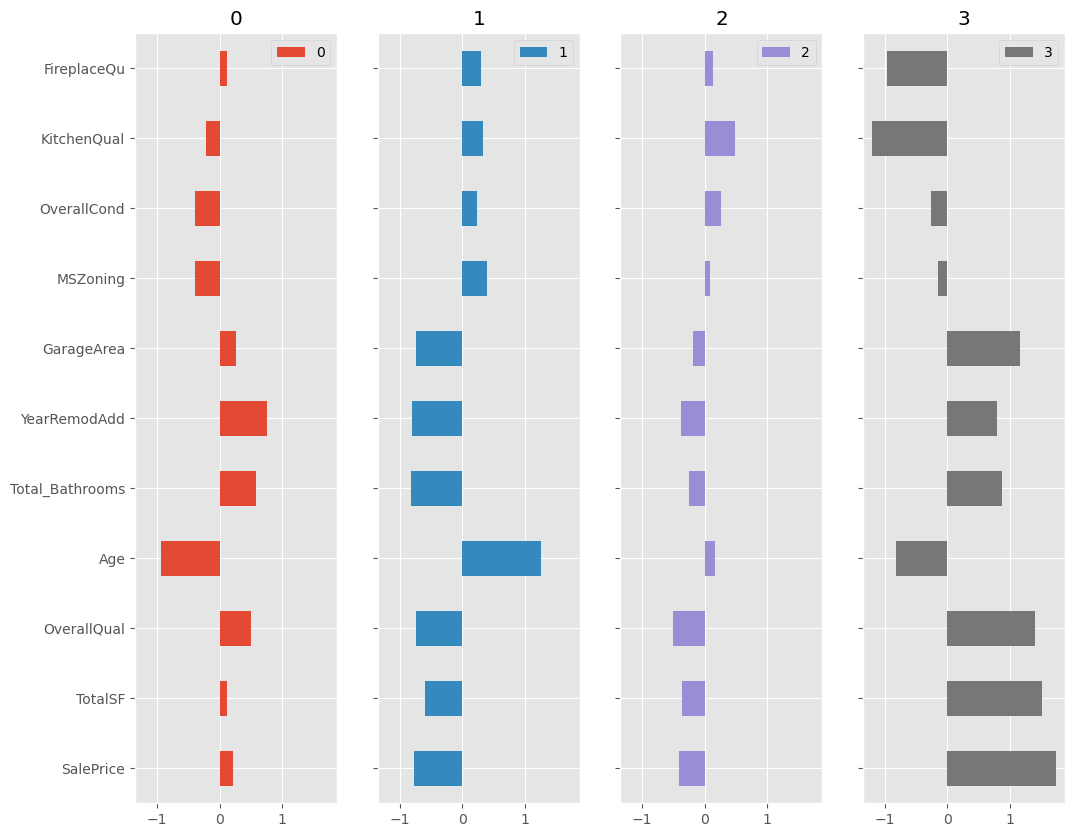

In [125]:
cluster_mean[1:].plot(figsize = (12, 10), kind = "barh", subplots = True, layout = (1, 4), sharey = True)

#### k-means 결과 분석

 - 클러스터 0은 전체적으로 오래된 집이지만 최근에 리모델링을 통해 품질은 평균 이상이고, 화장실 수도 많이 있어 중간정도의 가격을 가지고 있다.
 <br>
 
 - 클러스터 1은 가장 최근에 지어진 주택이지만 집의 전체적인 품질이 떨어지고 기타 시설들도 빈약하여 가격이 많이 낮은 것을 볼 수 있다
 <br>
 
 - 클러스터 2는 특출난 점도 없고 모난 점도 없어서 가장 평범한 집의 모임이다
 <br>
 
 - 클러스터 3은 조금 오래되긴 하였지만 집의 면적도 넓고, 품질도 좋고, 시설도 잘 되어있어서 가장 비싼 집들의 모임이다

### 주성분 분석

변수가 많은 경우 클러스터 분석을 해석하기 힘들 수도 있다

그러한 경우 차원축소 방법을 사용해서 원래 변수의 특징을 바탕으로 대표되는 변수를 새롭게 만들어 대체하여 전체적인 변수의 수를 줄이는 방법이다

위의 주택 분석의 경우는 TotalBsmtSF, 1stFlrSF, 2ndFlrSF 등의 변수는 전체 넓이라는 새로운 변수를 만들어 대체할 수도 있다.


In [126]:
from  sklearn.decomposition import PCA
pca = PCA(n_components = 2)
house_pca = pca.fit(train_scaled).transform(train_scaled)
house_pca

array([[ 2.64787424, -1.1427793 ],
       [ 0.59160483, -0.80186986],
       [ 3.27273501, -0.86687407],
       ...,
       [ 1.78389821,  3.57882803],
       [-3.03539312, -0.9897402 ],
       [-0.66050631, -1.1990688 ]])

In [127]:
house_pca_df = pd.DataFrame(house_pca)
house_pca_df.columns = ["pca1", "pca2"]

In [110]:
train_scaled_df = pd.concat([train_scaled_df,house_pca_df], axis = 1)
train_scaled_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch,SalePrice_log,km_cluster,pca1,pca2
0,0.069617,-0.045768,-0.206346,-0.288764,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,0.387825,-0.325762,-1.046470,0.038930,1.736093,0.4596,0.586795,0,2.647874,-1.142743
1,-0.877169,-0.045768,0.512944,-0.075476,0.058926,0.744525,0.310054,-0.026316,-0.634124,-0.222579,...,0.031995,-0.325762,-0.188288,-0.017716,0.640132,0.4596,0.233882,2,0.591605,-0.801637
2,0.069617,-0.045768,-0.062488,0.230544,0.058926,-1.387256,0.310054,-0.026316,0.601627,-0.222579,...,0.585509,-0.325762,-0.980456,0.227753,1.736093,0.4596,0.763584,0,3.272735,-0.866956
3,0.306313,-0.045768,-0.446109,-0.084750,0.058926,-1.387256,0.310054,-0.026316,-1.869875,-0.222579,...,-0.514930,-0.325762,1.792130,-0.086502,-0.455829,0.4596,-0.426767,1,-1.522228,2.171157
4,0.069617,-0.045768,0.704755,0.788800,0.058926,-1.387256,0.310054,-0.026316,-0.634124,-0.222579,...,0.934750,-0.325762,-0.947449,1.086897,1.736093,0.4596,1.048721,3,5.718597,0.948546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,0.069617,-0.045768,-0.350204,-0.387617,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,-0.053668,-0.325762,-0.947449,0.084787,0.640132,0.4596,0.141076,0,1.340956,-0.241171
1441,-0.877169,-0.045768,0.752707,0.587568,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,0.407594,-0.325762,-0.155281,1.453753,0.640132,0.4596,0.605037,2,1.782666,0.841906
1442,0.306313,-0.045768,-0.158393,-0.178967,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,1.152202,2.854821,1.065977,1.287858,-0.455829,0.4596,1.211364,0,1.783898,3.579623
1443,-0.877169,-0.045768,-0.062488,-0.053777,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,-0.486925,-0.325762,0.768914,-0.514051,-0.455829,0.4596,-0.388431,2,-3.035393,-0.990233


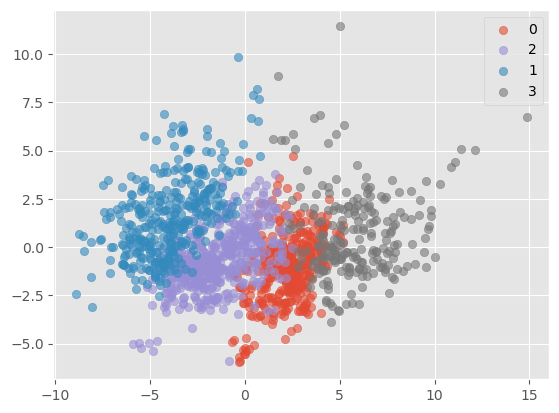

In [111]:
# 주성분 분석 결과 시각화 하기
my_colors = plt.rcParams["axes.prop_cycle"].by_key()['color']
for cl in train_scaled_df["km_cluster"].unique():
    plt.scatter(train_scaled_df.loc[train_scaled_df["km_cluster"] == cl, "pca1"],
                train_scaled_df.loc[train_scaled_df["km_cluster"] == cl, "pca2"],
                label = cl, c = my_colors[cl], alpha = 0.6)

                              
plt.legend()
plt.show()

In [112]:
pca_comp_df = pd.DataFrame(pca.components_, columns = train_scaled_df.drop(["km_cluster", "pca1", "pca2"], axis = 1).columns).T
pca_comp_df.columns = ["pca1", "pca2"]
pca_comp_df

,pca1,pca2
MSSubClass,-0.007451,-0.045197
MSZoning,-0.067692,0.062006
LotFrontage,0.089335,0.138855
LotArea,0.084628,0.168670
Street,0.010013,0.010760
...,...,...
Age,-0.197903,0.246229
TotalSF,0.218012,0.188240
Total_Bathrooms,0.189083,0.029206
hasPorch,0.091475,0.031042


이렇게 데이터를 분석하면 데이터 전체 경향을 파악할 수 있고 이를 통해 정확도를 더 높일 수 있다

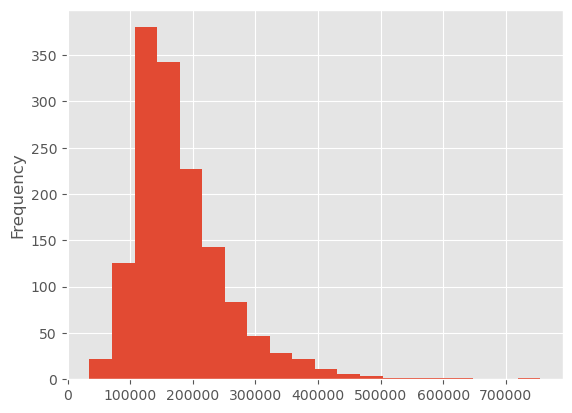

In [113]:
# 추가 분석 - 고급 주택 조건을 시각화
train_df_le['SalePrice'].plot.hist(bins = 20)

In [114]:
train_df_le.SalePrice.describe()

count      1445.000000
mean     179072.294118
std       75905.045476
min       34900.000000
25%      129900.000000
50%      162000.000000
75%      213000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [115]:
# 상위 10%의 가격 조사하기
train_df.SalePrice.quantile(0.9)

278000.0

In [116]:
train_df_le.loc[train_df["SalePrice"] >= 278000, "high_class"] = 1
train_df_le["high_class"] = train_df_le["high_class"].fillna(0)
train_df_le.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType,SaleCondition,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch,SalePrice_log,high_class
0,1,60,3,65.0,8450,1,3,3,0,4,...,8,4,208500.0,0,5,2566.0,4.0,1,12.247694,0.0
1,2,20,3,80.0,9600,1,3,3,0,2,...,8,4,181500.0,0,31,2524.0,3.0,1,12.109011,0.0
2,3,60,3,68.0,11250,1,0,3,0,4,...,8,4,223500.0,0,7,2706.0,4.0,1,12.317167,0.0
3,4,70,3,60.0,9550,1,0,3,0,0,...,8,0,140000.0,0,91,2473.0,2.0,1,11.849398,0.0
4,5,60,3,84.0,14260,1,0,3,0,2,...,8,4,250000.0,0,8,3343.0,4.0,1,12.429216,0.0


In [118]:
from sklearn import tree
import pydotplus
from six import StringIO

In [128]:
tree_x = train_df_le[["TotalSF", "OverallQual", "Age", "GrLivArea", "GarageCars", "Total_Bathrooms", "GarageType", "YearRemodAdd",
                      "GarageArea", "CentralAir", "MSZoning", "OverallCond", "KitchenQual", "FireplaceQu", "1stFlrSF"]]
tree_y = train_df_le[["high_class"]]

In [129]:
# 깊이를 지정하여 결정 트리 작성
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf = clf.fit(tree_x, tree_y)

In [130]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file = dot_data, feature_names = tree_x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

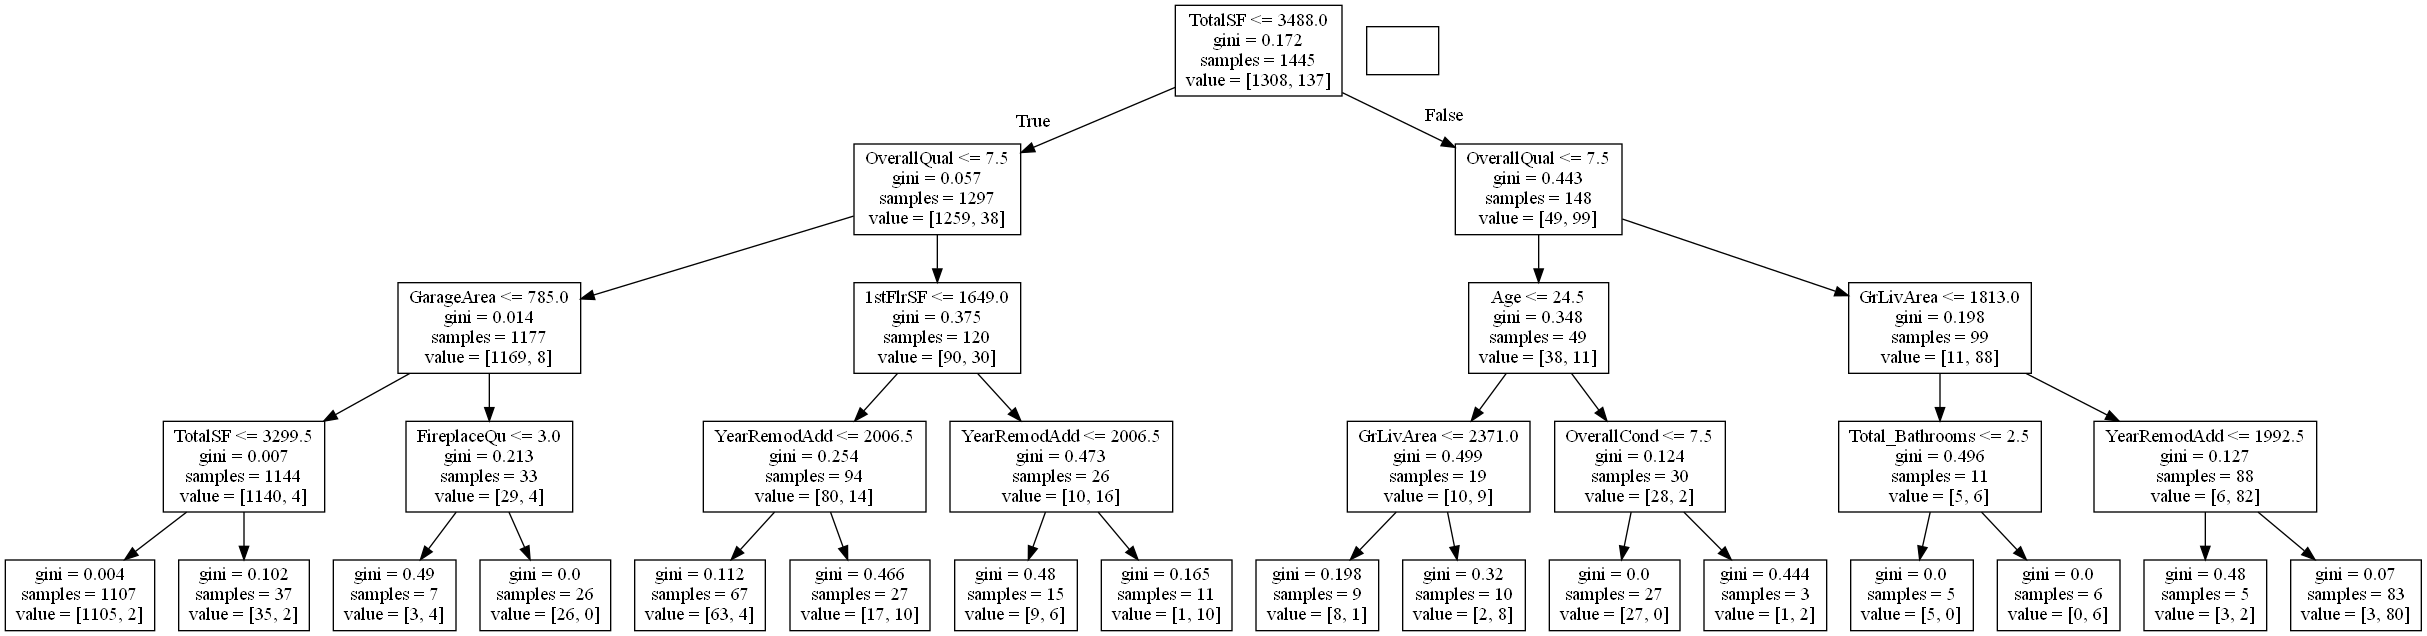

In [131]:
from IPython.display import Image
Image(graph.create_png())

이 트리를 분석해 보면 처음에 137개의 상위가격 집들이 TotalSF가 3488보다 큰곳으로 많이 갔으므로 집 크기가 클수록 비싸다

그 다음은 집의 품질이 7.5보다 큰 곳으로 많이 갔으므로 집의 품질이 좋을 수록 집값이 비싸다

그리고 GrLivArea가 1813보다 큰 곳으로 갈수록 비싸고 리모델링이 최근한 한 집일수록 비싸다는 것을 알 수 있다
